# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status. 


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No 
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment. 
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries and data

In [1]:
# Library to suppress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Library to split data 
from sklearn.model_selection import train_test_split

# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score,f1_score,    make_scorer,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
#!pip install xgboost
from xgboost import XGBClassifier
from xgboost import XGBRegressor



In [2]:
visa=pd.read_csv("EasyVisa.csv")

## Data Overview

- Observations
- Sanity checks

In [3]:
def checkthedata(df):
    """ Give key values of the data frame df """
    # display 2 rows from the beginning and the end of the dataframe and 10 randomly picked ones from inbetween
    display(df.head(2))
    display(df.tail(2))
    np.random.seed(1)
    display(df.sample(n=10))

    # print key information about the dataframe
    
    print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.\n") # shape
    display(df.info()) # columns & datatypes
    print('\033[1m' + "\nDescribe Data:"+ '\033[0m')
    df_num=df.select_dtypes('number')
    df_cat=df.drop(df_num.columns,axis=1)
    print('\033[1m' + "\nNumerical Variables:"+ '\033[0m')    
    display(df_num.describe(include="all").T) # describe number values
    print('\033[1m' + "\nNon Numerical Variables:"+ '\033[0m')    
    display(df_cat.describe(include="all").T) # describe non-number values
    print('\033[1m' + "\nMissing Values:"+ '\033[0m')    
    print(df.isnull().sum()) # missing values
    print('\033[1m' + "\nDuplicates:"+ '\033[0m')  
    print(df.duplicated().sum()) # Duplicates

In [4]:
checkthedata(visa)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified


,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
17639,EZYV17640,Asia,Bachelor's,Y,N,567,1992,Midwest,26842.9100,Year,Y,Certified
23951,EZYV23952,Oceania,Bachelor's,N,N,619,1938,Midwest,66419.9800,Year,Y,Certified
8625,EZYV8626,Asia,Master's,N,N,2635,2005,South,887.2921,Hour,Y,Certified
20206,EZYV20207,Asia,Bachelor's,Y,Y,3184,1986,Northeast,49435.8000,Year,Y,Certified
7471,EZYV7472,Europe,Bachelor's,Y,N,4681,1928,West,49865.1900,Year,Y,Denied
3433,EZYV3434,Asia,Bachelor's,Y,N,222,1989,South,813.7261,Hour,Y,Certified
24440,EZYV24441,Europe,High School,N,Y,3278,1994,South,204948.3900,Year,Y,Denied
12104,EZYV12105,Asia,Master's,Y,N,1359,1997,West,202237.0400,Year,N,Certified
15656,EZYV15657,Asia,Bachelor's,N,N,2081,2003,West,111713.0200,Year,Y,Denied
23110,EZYV23111,North America,Bachelor's,Y,N,854,1998,Northeast,444.8257,Hour,Y,Denied


There are 25480 rows and 12 columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


None


Describe Data:

Numerical Variables:


,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27



Non Numerical Variables:


,count,unique,top,freq
case_id,25480,25480,EZYV01,1
continent,25480,6,Asia,16861
education_of_employee,25480,4,Bachelor's,10234
has_job_experience,25480,2,Y,14802
requires_job_training,25480,2,N,22525
region_of_employment,25480,5,Northeast,7195
unit_of_wage,25480,4,Year,22962
full_time_position,25480,2,Y,22773
case_status,25480,2,Certified,17018



Missing Values:
case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

Duplicates:
0


#### Observations
- The data contains 25480 rows and 12 columns
- no_of_employees and yr_of_estab are integers, prevailing_wag is a float, everything else is data type object
- minimum number of employees has a negative value, that needs to be looked into
- case id is unique and can be dropped
- no missing values
- no duplicates


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

In [5]:
""" a block of user defined functions to look at individual variables from a dataframe: 
    - box_hist: plot boxplot and histogram next to each other
    - find_outliers: checks for outliners that are more than x-times IQR away from the data mean
    - check_number_variable: analyzes at a numerical variable
    - labeled_barplot: plots a barplot
    - check_out_object: analyzes a non-numerical variable
    - check_transformations: check different transformations for distribiution
    - a_lot_of_barplots plots barplots of several columns

"""

def box_hist(name,df,binsplot=20,Headline=""):
    
    """    
    plotting a boxplot and a histogram next to each other
    name = name of variable in df
    df=dataframe
    binsplot=number of bins in histograms
    Headline=title of plot
    allrows = all rows in figure if several columns need to be plotted below each other
    plot size needs to be defined before running this function so it can be run in loops
     """   
    #fig = plt.gcf()
    #fig.set_size_inches(16,5)
    plt.figure(figsize=(15, 5))

    if Headline=="":Headline=name # the title of the plot

    #left box plot
    plt.subplot(1,2,1); 
    plt.xlabel(name);
    sns.boxplot(data = df, x =df[name], showmeans=True).set(xlabel=Headline);

    #right histogram 
    plt.subplot(1,2,2); 
    plt.xlabel(Headline);
    #plt.ylabel("number of people who landed on page");
    plt.axvline(df[name].mean(), color='g', linewidth=2,label="Mean"); #green mean line
    plt.axvline(df[name].median(), color='b', linestyle='dashed', linewidth=2,label="Median"); #blue dashed median line
    plt.legend()
    sns.histplot(df[name],bins=binsplot,kde="kde");
    plt.show()
    



def find_outliers(data,iqr_multiplier=4):
    
    """ checks for outliners that are more than iqr_multipliere*IQR away from the data mean """
    data=data.dropna() #drop missing values
    all=data.count() #number of elements
    q1 = np.percentile(data, 25) # 25 percentile mark of data
    q2 = np.percentile(data, 50) # 50 percentile mark = median of data    
    q3 = np.percentile(data, 75) # 75 percentile mark of data

    IQR = q3-q1 #Inter quartile range 
    lwr_bound = q2-iqr_multiplier*IQR #lower end for outliners
    upr_bound = q2+iqr_multiplier*IQR #upper end for outliners

    #j = np.array(all)
    upper_percent=sum(i > upr_bound for i in data)/all*100 #count data in upper outliner range in % of all data
    lower_percent=sum(i < lwr_bound for i in data)/all*100  #count data in lower outliner range in % of all data
    
    upperandlower=upper_percent+lower_percent # % all outliers

    return upper_percent,lower_percent,upperandlower,lwr_bound,upr_bound


def check_number_variable(df,name,bins=20,display_it='both',Header=""):
    
    """ 
    analyzes at a numerical variable, print statistical values and plot a boxplot and a histogram
    display = both, table, plot
    """

    #find the correct row for our variable in df.describe().T
    
    if display_it != 'table':
        box_hist(name,df,binsplot=bins,Headline=Header)
    j=name 
    t=0
    p=0
    for i in df.select_dtypes('number').columns:
        if i==j:
            p=1
        if p==0:
            t=t+1
    data_describe=df.describe().T
    
    # pick the row and put it into a new df
    show_me=data_describe[t:t+1].copy()
    
    # add number of unique values, number of missing values, skewness, and % outliners in 4IQR range

    show_me['unique values']=df[j].nunique()
    show_me['missing values']=df[j].isnull().sum()
    show_me['skewedness']=round(df[j].skew(),1)
    show_me['% outliers 2IQR']=round(find_outliers(df[j],iqr_multiplier=2)[2],2)
    show_me['% outliers 4IQR']=round(find_outliers(df[j])[2],2)
  
    if display_it != 'plot':    
        #display statistical values
        display(show_me)
    
    #plot boxplot and histogram


    
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with count or percentage at the top
    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique() 
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot
    
def check_out_object(df,name):

    """ 
    look at a categorical/object variable, print statistical values and plot a barplot
    """

    # print barplot
    labeled_barplot(df, name, perc=True, n=None)
    
    # new df with top 5 and their percentage value
    df1=pd.DataFrame(round(df[name].value_counts(2)*100,1),df[name].value_counts().keys()[0:5])
    
    # new df with describe() of the column
    df2=pd.DataFrame(df[name].describe())

    #Transpose describe df
    df3=df2.T
    # add missing values
    df3['missing values']=df[name].isnull().sum()
    # combine dfs and rename column headers in df1 to add '%' 
    df3=df3.join(df1.T.rename(columns=lambda s: "%"+str(s)))

    display(df3)
    

In [6]:
visa.drop('case_id',axis=1,inplace=True) # drop case id

#### Number of employees

As seen above, we have companies with a negative employment count. Let's look at the companies that have less than 1 employee first.

In [7]:
visa[visa['no_of_employees']<1].describe(include='all') 

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
count,33,33,33,33,33.000000,33.000000,33,33.000000,33,33,33
unique,5,4,2,2,NaN,NaN,4,NaN,2,2,2
top,Asia,Bachelor's,N,N,NaN,NaN,South,NaN,Year,Y,Certified
freq,21,14,17,27,NaN,NaN,11,NaN,29,32,17
mean,NaN,NaN,NaN,NaN,-17.757576,1991.303030,NaN,64842.333273,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,6.285053,20.598066,NaN,47513.249244,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,-26.000000,1923.000000,NaN,103.970000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,-25.000000,1984.000000,NaN,27599.350000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,-14.000000,1999.000000,NaN,58488.500000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,-11.000000,2005.000000,NaN,100463.580000,NaN,NaN,NaN


In [8]:
visa[visa['no_of_employees']<=26].describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,95.000000,95.000000,95.000000
mean,6.484211,1987.421053,71811.222128
std,18.328482,35.229213,55971.352262
min,-26.000000,1831.000000,51.850300
25%,-12.500000,1987.000000,27312.920000
50%,18.000000,2000.000000,62722.490000
75%,20.000000,2006.500000,110633.050000
max,24.000000,2014.000000,272311.210000


There is no real pattern here. I can't imagine it being a typo, because the program shouldn't allow negative numbers to be entered. There are other records with employee numbers between 0 and 26, so it's not that all under 26 accidentally were made negative. Something must have happened on the backend. Since this isn't a significant amount of data, I'll just remove those 33 lines. 

In [9]:
visa.drop(visa[visa['no_of_employees']<1].index,inplace=True)

Let's look at the remaining data:

#### Continent

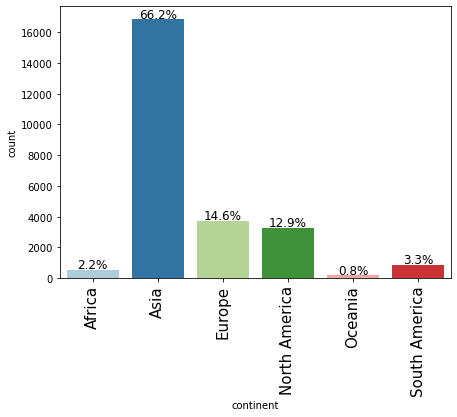

,count,unique,top,freq,missing values,%Asia,%Europe,%North America,%South America,%Africa
continent,25447,6,Asia,16840,0,66.2,14.6,12.9,3.3,2.2


In [10]:
check_out_object(visa,'continent')

- 2/3 are from Asia, 15% from Europe, 13% from North America, less than 7% are from South America, Africa and Oceania


#### Education of Employee

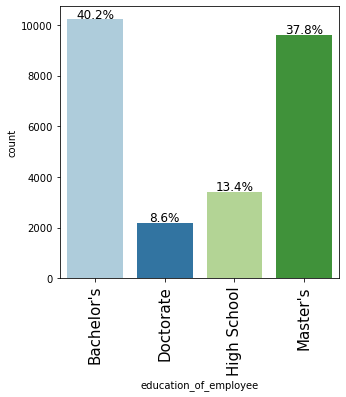

,count,unique,top,freq,missing values,%Bachelor's,%Master's,%High School,%Doctorate
education_of_employee,25447,4,Bachelor's,10220,0,40.2,37.8,13.4,8.6


In [11]:
check_out_object(visa,'education_of_employee')

In [12]:
# adding a column with assigned numbers to education levels
d = {'High School':1, "Bachelor's":2,  "Master's":3,"Doctorate":4}
visa["education_num"] = visa["education_of_employee"].map(d)

- About 40% each have a Master's or a Bachelor's degree, followed by a High School degree (13%) and only 9% have a Doctorate Degree

#### Job Experience

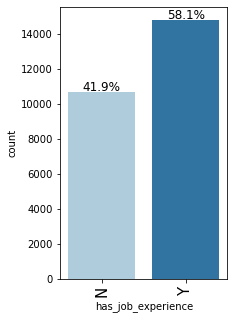

,count,unique,top,freq,missing values,%Y,%N
has_job_experience,25447,2,Y,14786,0,58.1,41.9


In [13]:
check_out_object(visa,'has_job_experience')

Nearly 60% have job experience compared to 40% who have not.

#### Requires Job Training

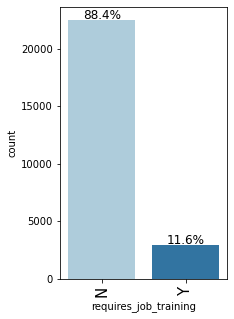

,count,unique,top,freq,missing values,%N,%Y
requires_job_training,25447,2,N,22498,0,88.4,11.6


In [14]:
check_out_object(visa,'requires_job_training')

- only 12% reqire job training

#### Number of Employees in the Company

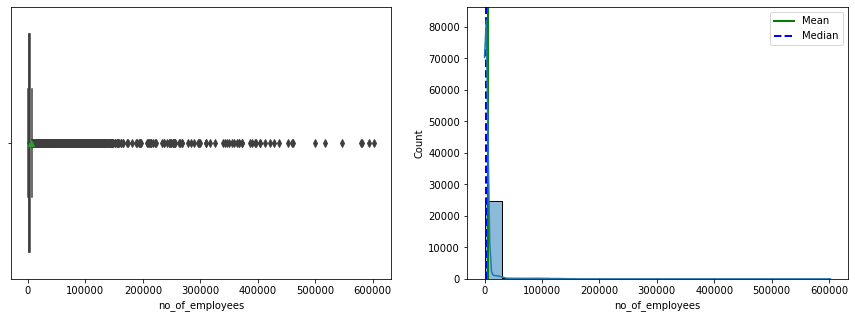

,count,mean,std,min,25%,50%,75%,max,unique values,missing values,skewedness,% outliers 2IQR,% outliers 4IQR
no_of_employees,25447.0,5674.415334,22891.842245,12.0,1025.0,2112.0,3506.5,602069.0,7100,0,12.3,6.14,5.31


In [15]:
check_number_variable(visa,'no_of_employees')

In [16]:
#adding a categorized column for number of employes
def b_size(employees):
    if employees<150:
        return 'very small' 
    elif employees<1000:
        return 'small'
    elif employees<2000:
        return 'medium'
    else:
        return 'large'
visa['business_size']=visa.apply(lambda x: b_size(x['no_of_employees']), axis = 1)

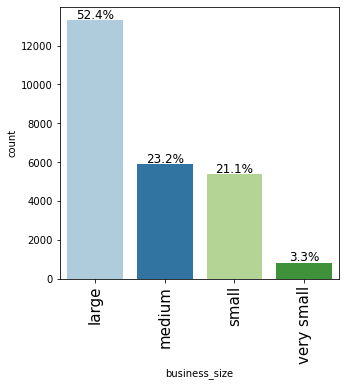

,count,unique,top,freq,missing values,%large,%medium,%small,%very small
business_size,25447,4,large,13332,0,52.4,23.2,21.1,3.3


In [17]:
check_out_object(visa,'business_size')

- The number of employees ranges from 12-602,069 with an average of 5674. The data is highly right skewed and has a lot of outliers.

#### Year of Establishment

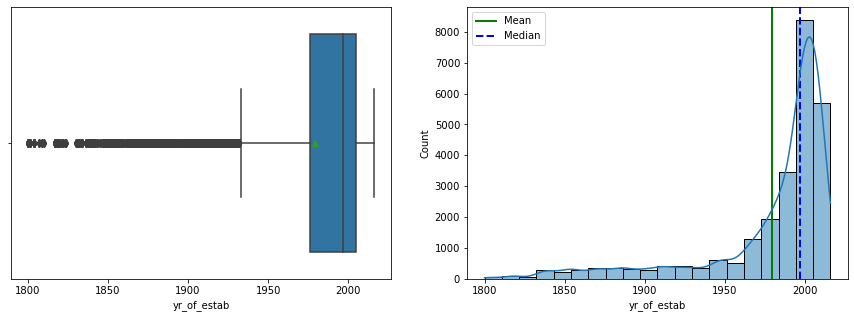

,count,mean,std,min,25%,50%,75%,max,unique values,missing values,skewedness,% outliers 2IQR,% outliers 4IQR
yr_of_estab,25447.0,1979.394506,42.385932,1800.0,1976.0,1997.0,2005.0,2016.0,199,0,-2.0,13.46,5.9


In [18]:
check_number_variable(visa,'yr_of_estab')

In [19]:
#adding a categorized column for year of establishment
def b_age(year):
    if year>2012:
        return '<5' 
    elif year>2006:
        return '6-10'
    elif year>1992:
        return '11-25'
    else:
        return '>25'
visa['business_age']=visa.apply(lambda x: b_age(x['yr_of_estab']), axis = 1)

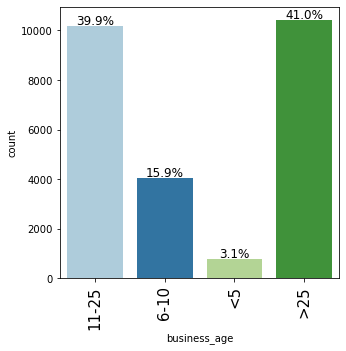

,count,unique,top,freq,missing values,%>25,%11-25,%6-10,%<5
business_age,25447,4,>25,10437,0,41.0,39.9,15.9,3.1


In [20]:
check_out_object(visa,'business_age')

- The companies were established between 1800 and 2016, half of them were established between 1976 and 2005.

#### Region of Employment

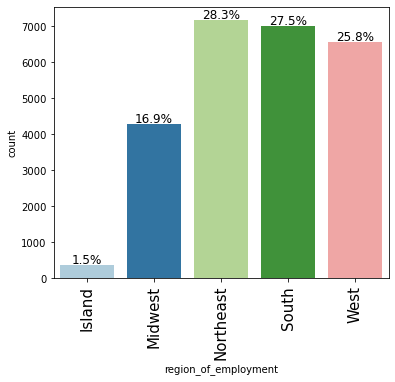

,count,unique,top,freq,missing values,%Northeast,%South,%West,%Midwest,%Island
region_of_employment,25447,5,Northeast,7189,0,28.3,27.5,25.8,16.9,1.5


In [21]:
check_out_object(visa,'region_of_employment')

- Most applicants want to work in the Northeast, but Northeast, South and West are all between 26-28%. Midwest is not as popular with 17% and Islands is only 1.5%.

#### Prevailing Wage

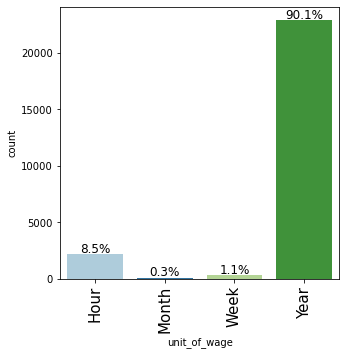

,count,unique,top,freq,missing values,%Year,%Hour,%Week,%Month
unit_of_wage,25447,4,Year,22933,0,90.1,8.5,1.1,0.3


In [22]:
check_out_object(visa,'unit_of_wage')

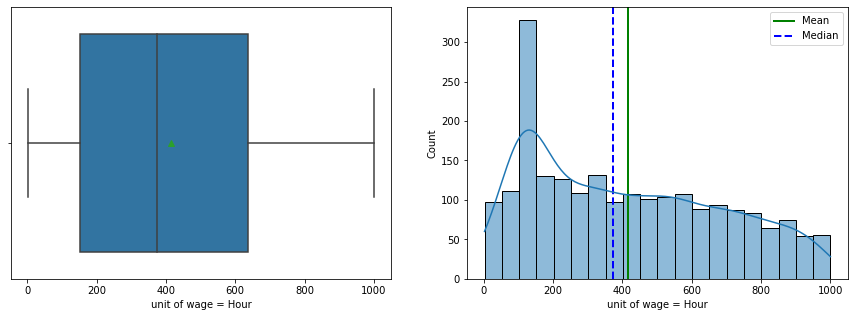

,count,mean,std,min,25%,50%,75%,max,unique values,missing values,skewedness,% outliers 2IQR,% outliers 4IQR
prevailing_wage,2153.0,414.773882,275.052214,2.1367,152.7003,373.2045,637.3111,999.9195,2141,0,0.4,0.0,0.0


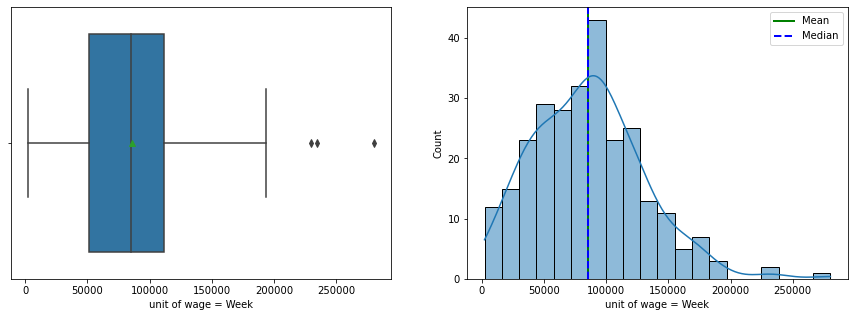

,count,mean,std,min,25%,50%,75%,max,unique values,missing values,skewedness,% outliers 2IQR,% outliers 4IQR
prevailing_wage,272.0,85606.820515,44802.70481,2183.23,51408.2775,85075.82,111331.91,280175.95,272,0,0.7,1.1,0.0


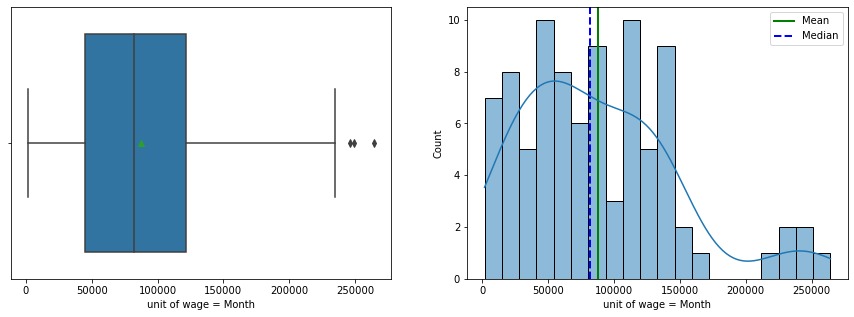

,count,mean,std,min,25%,50%,75%,max,unique values,missing values,skewedness,% outliers 2IQR,% outliers 4IQR
prevailing_wage,89.0,87592.864045,59525.124924,1599.28,44986.24,81826.01,121629.6,264362.95,89,0,1.0,3.37,0.0


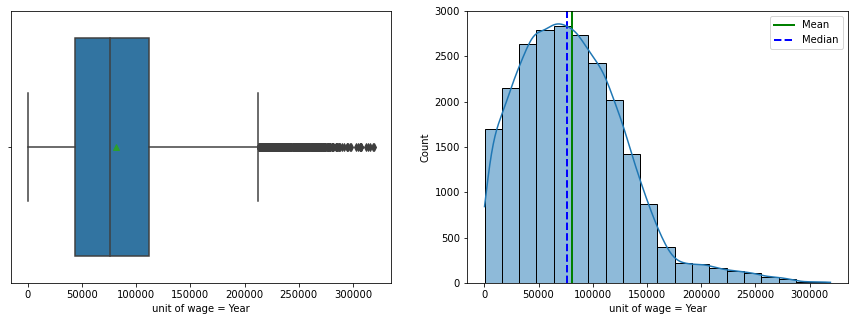

,count,mean,std,min,25%,50%,75%,max,unique values,missing values,skewedness,% outliers 2IQR,% outliers 4IQR
prevailing_wage,22933.0,81237.541122,49959.089955,100.0,43741.96,76172.83,111341.97,319210.27,22921,0,0.9,2.13,0.0


In [23]:
#check prevailing wage for different units

unit=('Hour','Week','Month','Year')

for i, variable in enumerate(unit):
    check_number_variable(visa[visa['unit_of_wage']==variable],'prevailing_wage',Header='unit of wage = '+variable)

Most units are Year, but there are Hour, Week and Month as well.

Since it is also for part time and full time positions, and we don't know how many hours the applicants are supposed to work, any calculated yearly wage for the other units of wage won't have real value. 

The data itself shows some wild outliers, that might indicate that they have been entered with the wrong unit, like the $280,000 per week. But it's not impossible. 

I am actually more worried about the really low entries. In 2018 the minimum wage was \\$7.25 in the US and that would be reflected in the prevailing wage. So I will set the hourly rates below that amount to \\$7.25. 

This is the only change I will make to the prevailing wage data, but in the appendix, I show more thoughts on that and where we would need to check back about the data. But for the sake of model building I will take the data at face value.

In [24]:
# Copy to use in the appendix later
wages=visa.copy()

#### Full time position

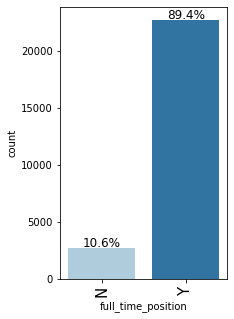

,count,unique,top,freq,missing values,%Y,%N
full_time_position,25447,2,Y,22741,0,89.4,10.6


In [25]:
check_out_object(visa,'full_time_position')

- 90% applied for a full time position, 10% for a part time position

#### Case Status

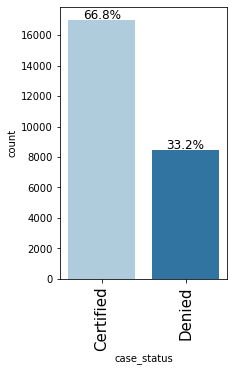

,count,unique,top,freq,missing values,%Certified,%Denied
case_status,25447,2,Certified,17001,0,66.8,33.2


In [26]:
check_out_object(visa,'case_status')

- about 33% of the visa applications are denied.

## Bivariant Analysis

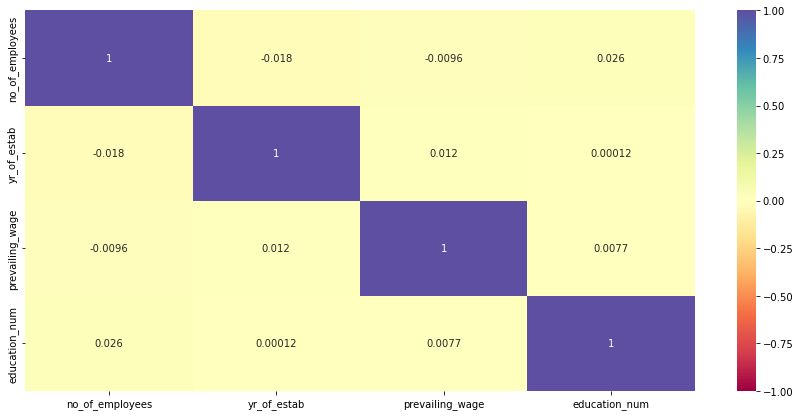

In [27]:
plt.figure(figsize=(15, 7))
sns.heatmap(visa.corr(), annot=True, vmin=-1, vmax=1, cmap="Spectral")
plt.show()

There are no correlation in the heatmap.

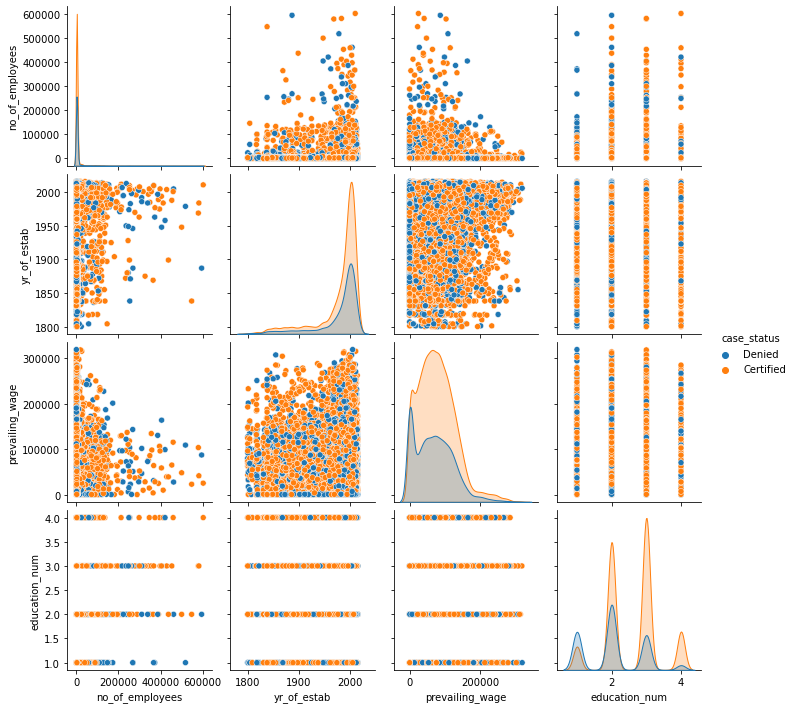

In [28]:
sns.pairplot(data=visa,hue="case_status")
plt.show()

The pairplot indicates that newer companies and companies with less employees are more likely to pay very high wages. 

In [29]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    
    """
    all=data.shape[0]
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    tab1['Perc_All']=round(tab1['All']/all*100,2)
    tab1['Perc_certified']=round(tab1['Certified']/tab1['All']*100,2)
    display(tab1)
    
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    
    sns.set(palette="Paired",style='white')
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()
    
    

### Compare all variables to case status

case_status,Certified,Denied,All,Perc_All,Perc_certified
continent,,,,,
All,17001,8446,25447,100.00,66.81
Asia,11001,5839,16840,66.18,65.33
North America,2037,1250,3287,12.92,61.97
Europe,2953,774,3727,14.65,79.23
South America,492,359,851,3.34,57.81
Africa,396,154,550,2.16,72.00
Oceania,122,70,192,0.75,63.54


------------------------------------------------------------------------------------------------------------------------


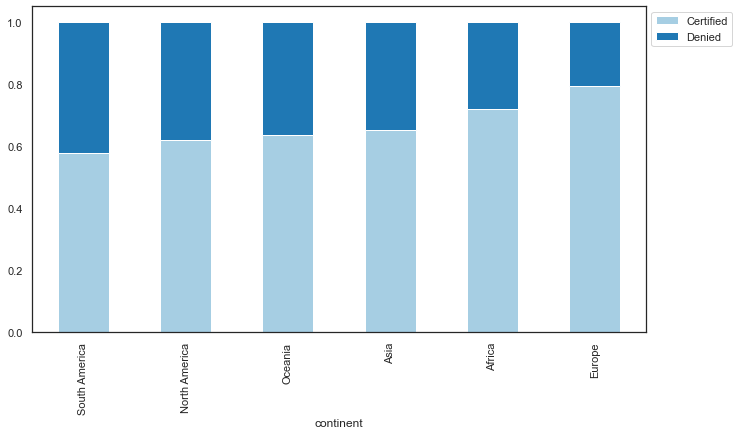

case_status,Certified,Denied,All,Perc_All,Perc_certified
education_of_employee,,,,,
All,17001,8446,25447,100.00,66.81
Bachelor's,6362,3858,10220,40.16,62.25
High School,1164,2252,3416,13.42,34.07
Master's,7565,2057,9622,37.81,78.62
Doctorate,1910,279,2189,8.60,87.25


------------------------------------------------------------------------------------------------------------------------


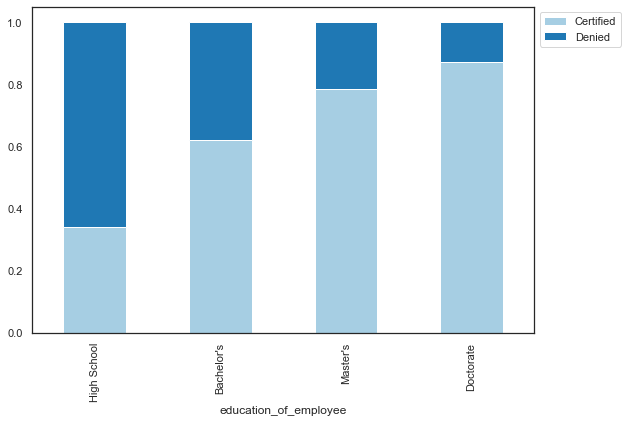

case_status,Certified,Denied,All,Perc_All,Perc_certified
has_job_experience,,,,,
All,17001,8446,25447,100.00,66.81
N,5986,4675,10661,41.89,56.15
Y,11015,3771,14786,58.11,74.50


------------------------------------------------------------------------------------------------------------------------


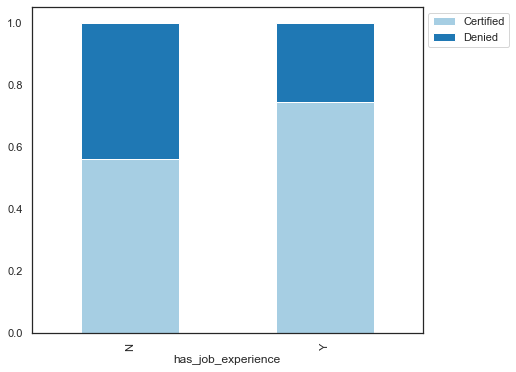

case_status,Certified,Denied,All,Perc_All,Perc_certified
requires_job_training,,,,,
All,17001,8446,25447,100.00,66.81
N,15000,7498,22498,88.41,66.67
Y,2001,948,2949,11.59,67.85


------------------------------------------------------------------------------------------------------------------------


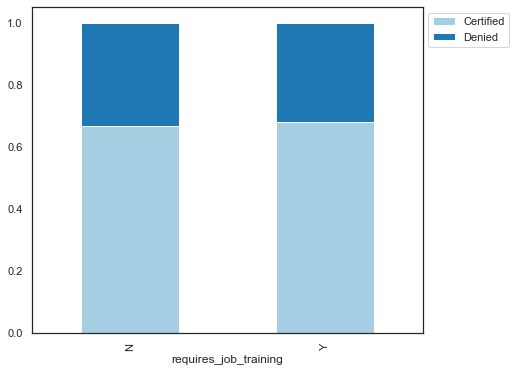

case_status,Certified,Denied,All,Perc_All,Perc_certified
region_of_employment,,,,,
All,17001,8446,25447,100.00,66.81
Northeast,4524,2665,7189,28.25,62.93
West,4097,2481,6578,25.85,62.28
South,4908,2098,7006,27.53,70.05
Midwest,3246,1053,4299,16.89,75.51
Island,226,149,375,1.47,60.27


------------------------------------------------------------------------------------------------------------------------


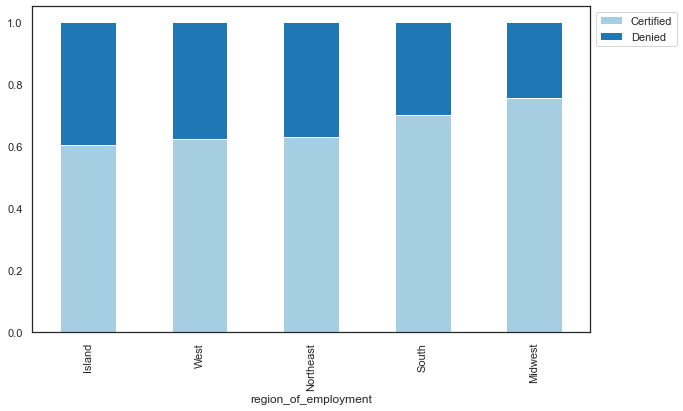

case_status,Certified,Denied,All,Perc_All,Perc_certified
unit_of_wage,,,,,
All,17001,8446,25447,100.00,66.81
Year,16030,6903,22933,90.12,69.90
Hour,747,1406,2153,8.46,34.70
Week,169,103,272,1.07,62.13
Month,55,34,89,0.35,61.80


------------------------------------------------------------------------------------------------------------------------


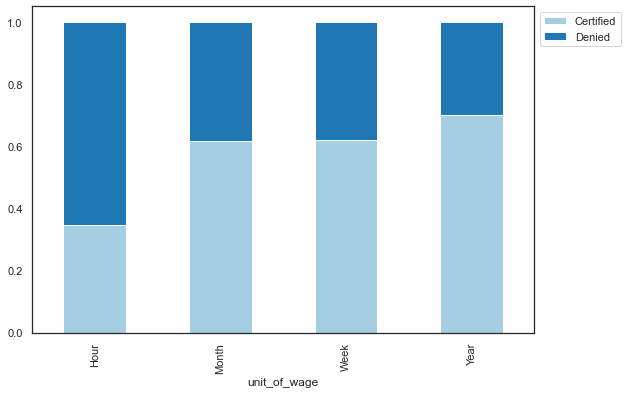

case_status,Certified,Denied,All,Perc_All,Perc_certified
full_time_position,,,,,
All,17001,8446,25447,100.00,66.81
Y,15146,7595,22741,89.37,66.60
N,1855,851,2706,10.63,68.55


------------------------------------------------------------------------------------------------------------------------


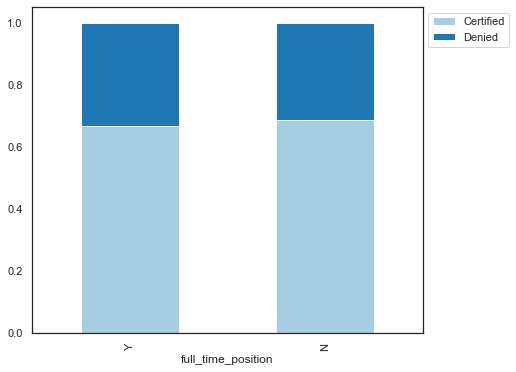

case_status,Certified,Denied,All,Perc_All,Perc_certified
business_size,,,,,
All,17001,8446,25447,100.00,66.81
large,9037,4295,13332,52.39,67.78
medium,3877,2036,5913,23.24,65.57
small,3563,1810,5373,21.11,66.31
very small,524,305,829,3.26,63.21


------------------------------------------------------------------------------------------------------------------------


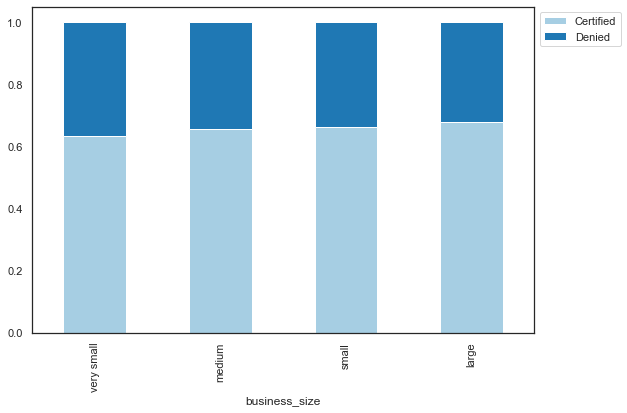

case_status,Certified,Denied,All,Perc_All,Perc_certified
business_age,,,,,
All,17001,8446,25447,100.00,66.81
>25,6912,3525,10437,41.01,66.23
11-25,6732,3429,10161,39.93,66.25
6-10,2811,1245,4056,15.94,69.30
<5,546,247,793,3.12,68.85


------------------------------------------------------------------------------------------------------------------------


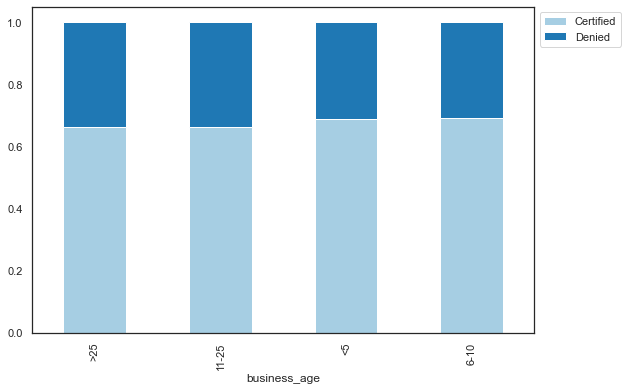

In [30]:
# plotting category variables vs. case status
num_cols=visa.select_dtypes('number') #finding number columns
cat_cols=visa.drop(num_cols,axis=1)   # getting non-number columns
cat_cols.drop('case_status',axis=1,inplace=True)                    

for i in cat_cols:
    stacked_barplot(visa, i, 'case_status')

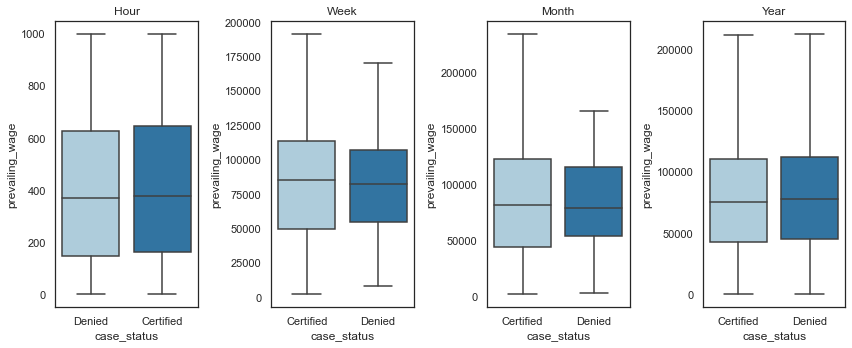

In [31]:
# Prevailing wage split by the different units of wage

unit=('Hour','Week','Month','Year')
plt.figure(figsize=(15, 5))

for i, variable in enumerate(unit):
    plt.subplot(1, 5, i + 1)
    sns.boxplot(x = 'case_status', y = 'prevailing_wage', data = visa[visa['unit_of_wage']==variable], palette="Paired",
         showfliers=False,
    )
    plt.tight_layout()
    
    plt.title(variable)
plt.show()

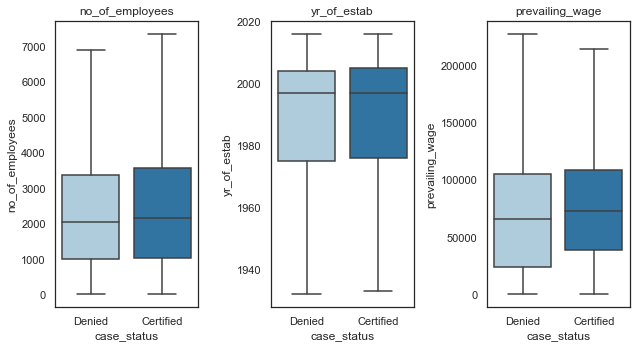

In [32]:
plt.figure(figsize=(15, 5))
num_cols.drop('education_num',axis=1,inplace=True)

for i, variable in enumerate(num_cols):
    plt.subplot(1, 5, i + 1)
    sns.boxplot(x = 'case_status', y = variable, data = visa, palette="Paired",
         showfliers=False,
    )
    plt.tight_layout()
    
    plt.title(variable)
plt.show()

#### Case Status vs. other variables

- Workers from Europe are more likely to get certified, people from South Africa are most likely to get denied.
- The higher the education, the more likely a worker is to become certified.
- Workers with job experience are more likely to get certified.
- Whether a person requires job training, doesn't have a notable impact.
- Workers who want to work in the Midwest are more likely to get certified, followed by the South, Northeast. Workers who want to work in the Island Region and the West are more likely to get denied.
- If the wage is based on a yearly wage, the applicant is more likely to get certified. Hourly rates are more likely to get denied.
- Certifications for full time positions is about the same as for part time positions.
- Business size and business age don't have a notable impact
- Prevaling wage doesn't have a notable impact over the different units of wage. The average range of prevailing wage in the categories Week and Month to get certified is a bit wider.
- A doctor from Europe with job experience who wants to work in the midwest with a yearly salery is the most likely to be certified, while a person from South Africa with a Highschool degree and no job experience who wants to work in the Island region for an hourly wage is most likely to be denied.
 

In [33]:
def stacked_barplot_any(data, predictor, target,tab=False):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    tab: print the table
    """
    count = data[predictor].nunique()
    plt.figure(figsize=(2*count+10, 5))
    
    if tab==True:
        tab1 = pd.crosstab(data[predictor], data[target], margins=True)
        print(tab1)
        print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index")
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [34]:
def stacked_barplot_triple(data, predictors, target):
    """
    Print 3 stacked bar plots next to each other for each status

    data: dataframe
    predictor: independent variable
    target: target variable
    
    """
    count = 10 #data[predictor].nunique()
    
    fig,(ax1,ax2,ax3)=plt.subplots(nrows=1,ncols=3)
    fig.suptitle(target,fontsize=15)
    
    
    plt.subplot(1, 3, 1)

    tab1 = pd.crosstab(data[predictors[0]], data[target], normalize="index")
    tab1.plot(ax=ax1,kind="bar", stacked=True, figsize=(count + 2, 5)             )
    
    #plt.legend(        loc="lower left", frameon=False,    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1)).remove()
    #plt.title(predictors[0])

    
    plt.subplot(1, 3, 2)

    tab2 = pd.crosstab(data[predictors[1]], data[target], normalize="index")
    tab2.plot(ax=ax2,kind="bar", stacked=True, figsize=(count + 2, 5) )
    
    #plt.legend(        loc="lower left", frameon=False,    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1)).remove()
    #plt.title(predictors[1])    
    
    plt.subplot(1, 3, 3)

    tab3 = pd.crosstab(data[predictors[2]], data[target], normalize="index")
    tab3.plot(ax=ax3,kind="bar", stacked=True, figsize=(count + 5, 5) )
    
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    #plt.title(predictors[2])
    
    
    plt.show()
    

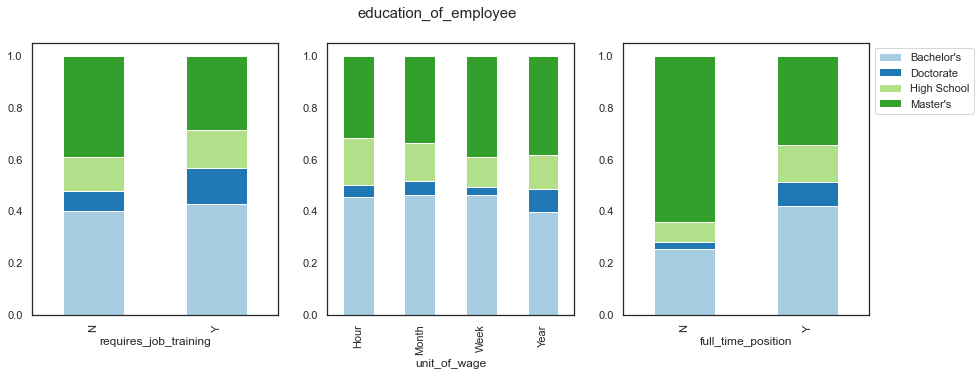

In [35]:
stacked_barplot_triple(visa, ['requires_job_training','unit_of_wage','full_time_position'], 'education_of_employee')

- Applicants with a Master or Doctorate are less likely to requre job training.
- More people with a Master or Doctorate are paid yearly thatn other units of wage.
- Most people with a part time position have a Master's while most people with a full time position have a Bachelor's Degree or a Doctorate

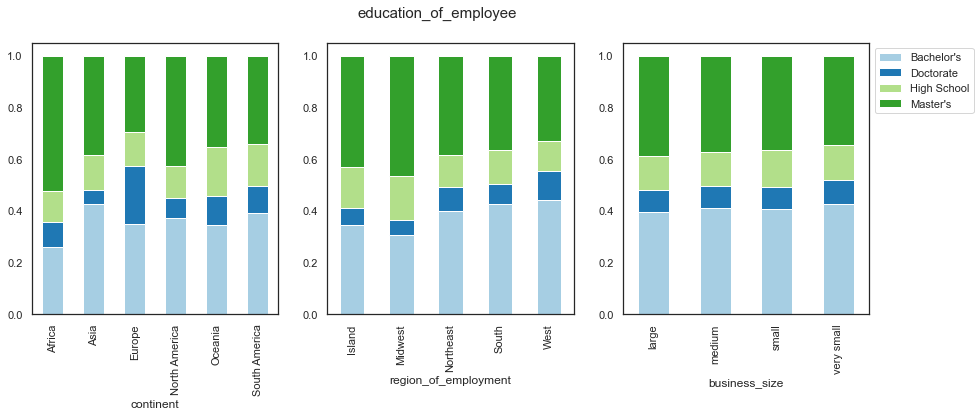

In [36]:
stacked_barplot_triple(visa, ['continent','region_of_employment','business_size'], 'education_of_employee')

- Oceania has the highest percentage of Highschool degrees, Asia has the most Bachelor's, Africa has the most Master's and Europe the most Doctorate degrees.
- Thehe Midwest has the highest percentage of Highschool and Master's degrees, the West has the highest perentage of people with a Bachelor or Doctorate.
- Business size doesn't really make an impact with education level in visa applications. 

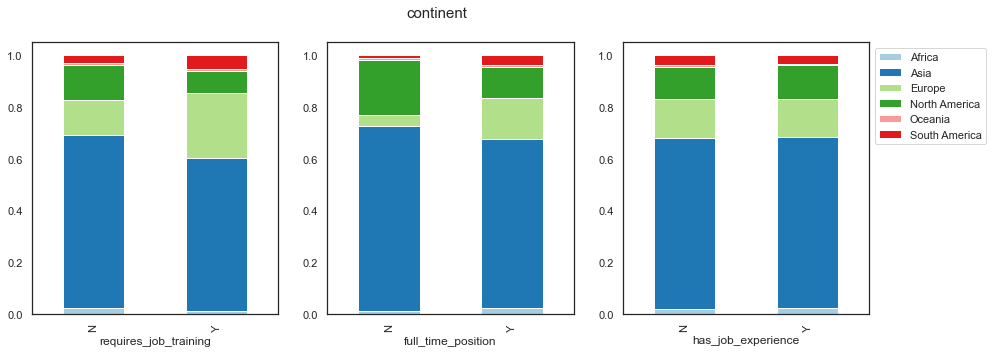

In [37]:
stacked_barplot_triple(visa, ['requires_job_training','full_time_position','has_job_experience'], 'continent')

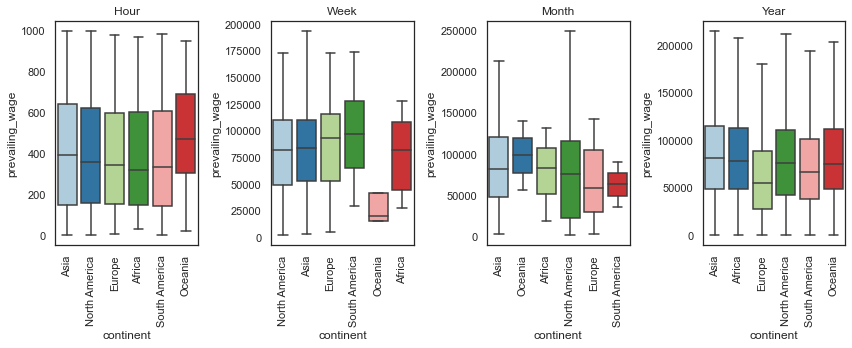

In [38]:
unit=('Hour','Week','Month','Year')
plt.figure(figsize=(15, 5))

for i, variable in enumerate(unit):
    plt.subplot(1, 5, i + 1)
    sns.boxplot(x = 'continent', y = 'prevailing_wage', data = visa[visa['unit_of_wage']==variable], palette="Paired",
         showfliers=False,
    )
    plt.xticks(rotation=90)
    plt.tight_layout()
    
    plt.title(variable)
plt.show()

- Less percent of people from Asia and North America require job training, while people from Europe and South America are more likely to require job training.
- People from Europe and South Africa are more likely do apply for a full time position while people from Asia and North America are more likely to apply for a part time position.
- The continent of origin doesn't have an impact on whether someone has job experience or not.
- People from Oceania get the highest hourly and monthly wage, but the least weekly wage on average.
- People from South America get the highest weekly salery on average. 
- People from Asia, Africa, North America and Oceania get higher yearly wages than Europeans and South Americans
- Europeans get the lowest average monthly wage.

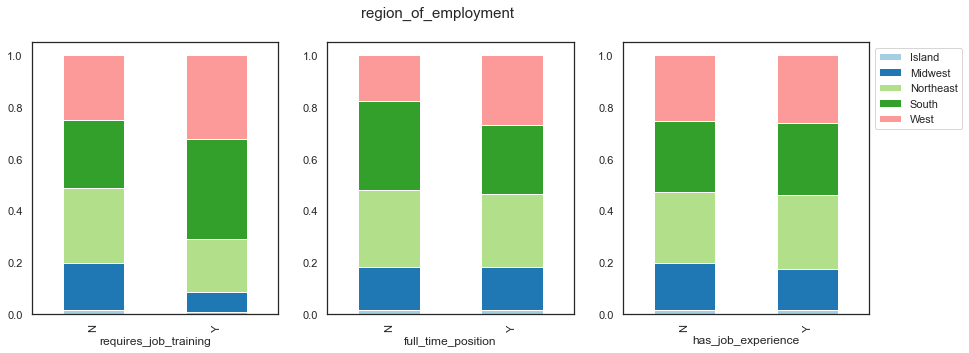

In [39]:
stacked_barplot_triple(visa, ['requires_job_training','full_time_position','has_job_experience'], 'region_of_employment')

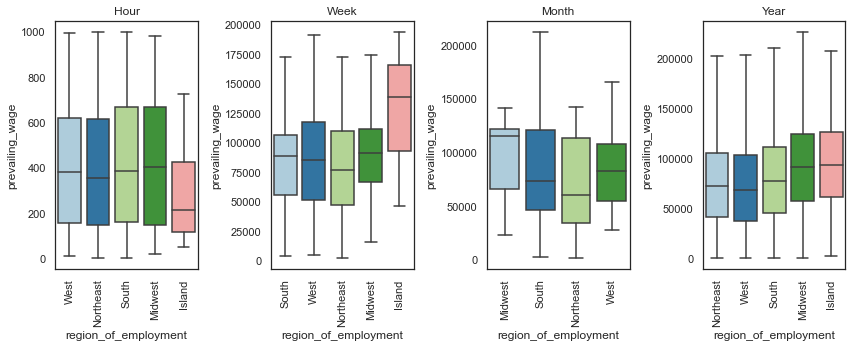

In [40]:
unit=('Hour','Week','Month','Year')
plt.figure(figsize=(15, 5))

for i, variable in enumerate(unit):
    plt.subplot(1, 5, i + 1)
    sns.boxplot(x = 'region_of_employment', y = 'prevailing_wage', data = visa[visa['unit_of_wage']==variable], palette="Paired",
         showfliers=False,
    )
    plt.xticks(rotation=90)
    plt.tight_layout()
    
    plt.title(variable)
plt.show()

- More employers in the South and West ask for workers who need job training while employees in the Midwest and Northeast are more likely to employ applicants who don't need job training.
- Positions in the South are more likely to be part time positions, positions in the West are more likely to be full time positions.
- The region of employment doesn't have an impact on whether someone has job experience or not.
- The highest yearly wage is approximately the same in the Island region and the Midwest. 
- The highest weekly wage is paid in the Island Region.
- The lowest yearly wage on average is paid in the West, the lowest hourly wage is paid in the Island region.
- The highest hourly wage is approximately the same in the West, South and Midwest.

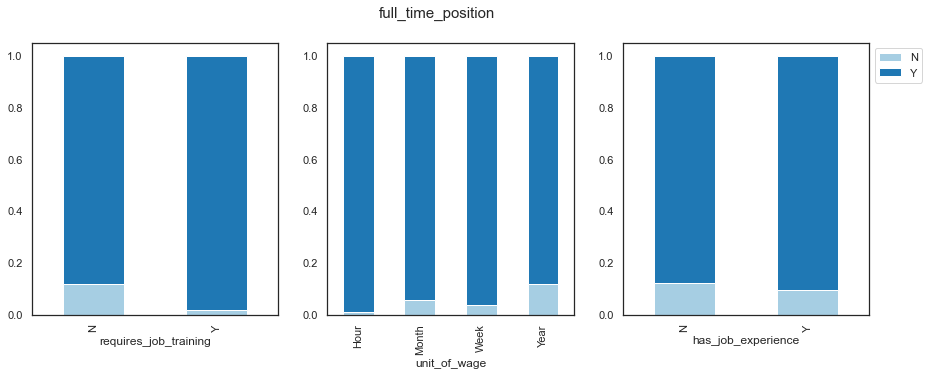

In [41]:
stacked_barplot_triple(visa, ['requires_job_training','unit_of_wage','has_job_experience'], 'full_time_position')

- Part time positions are less likely to require job training.
- Part time positions are more likely to come with a yearly prevailing wage while hourly prevailing wage is nearly no part time positions.
- It doesn't really matter if someone has job experience or not whether they applied for a part time or full time positon.

<Figure size 1584x360 with 0 Axes>

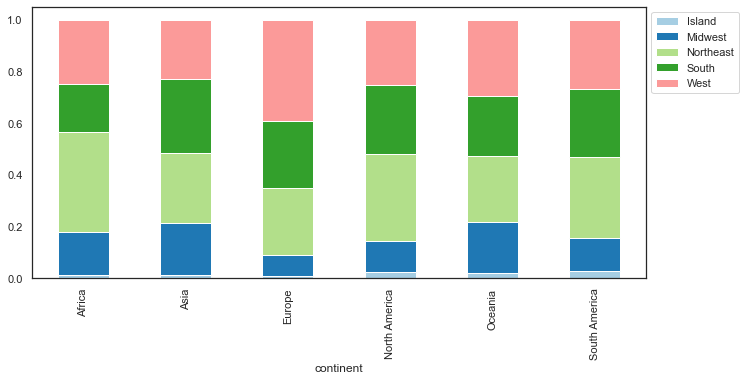

In [42]:
stacked_barplot_any(visa, 'continent', 'region_of_employment')

In [43]:
#sorter = visa['continent'].value_counts().index[-1]
tab1 = pd.crosstab(visa['continent'], visa['region_of_employment'], margins=True)
tab1

region_of_employment,Island,Midwest,Northeast,South,West,All
continent,,,,,,
Africa,8,91,212,102,137,550
Asia,226,3366,4587,4797,3864,16840
Europe,32,301,964,972,1458,3727
North America,82,392,1111,869,833,3287
Oceania,4,38,49,44,57,192
South America,23,111,266,222,229,851
All,375,4299,7189,7006,6578,25447


- most people from Africa and South America want to go to the Northwest
- most people from Asia and North America want to go to the South
- most people from Europe and Oceania want to go to the West

**Leading Questions**:
1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification? 

2. How does the visa status vary across different continents? 
 
3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status? 
 
4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa? 
 
5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

All questions are answered above.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering 
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

In [44]:
visa_mod=visa.copy()

In [45]:
# dropping unnecessary columns
visa_mod=visa.drop(['education_num','business_size','business_age'],axis=1).copy()

In [46]:
# changing all hourly wage below minimum wage to minimum wage
visa_mod.loc[visa_mod['prevailing_wage']<7.25,'prevailing_wage']=7.25

# more thoughts about wage in the Appendix

In [47]:
#changing case status to integer
visa_mod["case_status"] = visa_mod["case_status"].apply(lambda x: 1 if x == "Certified" else 0)

In [48]:
#remaining features
visa_mod.columns

Index(['continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

## EDA

It is a good idea to explore the data once again after manipulating it.

In [49]:
checkthedata(visa_mod)

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,0
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,1


,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25478,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,1
25479,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,1


,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
6675,Asia,Bachelor's,Y,N,1198,1977,South,92156.82,Year,Y,1
1254,Asia,High School,Y,N,364,1993,Northeast,55294.64,Year,Y,0
22567,Europe,Doctorate,Y,N,4596,1951,South,58706.21,Year,Y,1
21354,Europe,Bachelor's,N,Y,2361,1946,West,129520.23,Year,Y,0
7233,Asia,Bachelor's,Y,N,1729,2009,Midwest,132996.89,Year,Y,1
15128,Asia,Bachelor's,N,N,2305,2008,Northeast,22317.89,Year,Y,1
24159,North America,Bachelor's,Y,N,1058,2001,West,65068.10,Year,Y,1
22269,Asia,Master's,N,N,1969,1995,Northeast,166818.97,Year,N,1
13483,Asia,Master's,N,N,3475,1929,West,46571.67,Year,Y,0
5694,Asia,Bachelor's,Y,N,771,2006,Northeast,42672.94,Year,Y,1


There are 25447 rows and 11 columns.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25447 entries, 0 to 25479
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   continent              25447 non-null  object 
 1   education_of_employee  25447 non-null  object 
 2   has_job_experience     25447 non-null  object 
 3   requires_job_training  25447 non-null  object 
 4   no_of_employees        25447 non-null  int64  
 5   yr_of_estab            25447 non-null  int64  
 6   region_of_employment   25447 non-null  object 
 7   prevailing_wage        25447 non-null  float64
 8   unit_of_wage           25447 non-null  object 
 9   full_time_position     25447 non-null  object 
 10  case_status            25447 non-null  int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 3.3+ MB


None


Describe Data:

Numerical Variables:


,count,mean,std,min,25%,50%,75%,max
no_of_employees,25447.0,5674.415334,22891.842245,12.00,1025.00,2112.0,3506.500,602069.00
yr_of_estab,25447.0,1979.394506,42.385932,1800.00,1976.00,1997.0,2005.000,2016.00
prevailing_wage,25447.0,74468.282663,52822.175701,7.25,34039.21,70312.5,107739.505,319210.27
case_status,25447.0,0.668094,0.470907,0.00,0.00,1.0,1.000,1.00



Non Numerical Variables:


,count,unique,top,freq
continent,25447,6,Asia,16840
education_of_employee,25447,4,Bachelor's,10220
has_job_experience,25447,2,Y,14786
requires_job_training,25447,2,N,22498
region_of_employment,25447,5,Northeast,7189
unit_of_wage,25447,4,Year,22933
full_time_position,25447,2,Y,22741



Missing Values:
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

Duplicates:
0


Data is looking good. Let's continue with building different models.

## Model evaluation criterion

Model can make wrong predictions as:
- Model predicts that the visa application will get certified but in reality, the visa application should get denied.
- Model predicts that the visa application will not get certified but in reality, the visa application should get certified.


#### Which case is more important?
Both the cases are important as:

- If a visa is certified while it should have been denied a US citizen will be unable to get this position. 

- If a visa is denied while it should have been certified the company and the US will be unable to fill a position that brings the company forward and in turn helps the economy.

#### How to reduce the losses?
F1 Score can be used a the metric for evaluation of the model, the greater the F1 score the higher are the chances of minimizing False Negatives and False Positives.


## Building bagging and boosting models

#### Creating the Training and Test Data

In [50]:
# Creating Training and Test Data
X = visa_mod.drop(["case_status"], axis=1)
Y = visa_mod["case_status"]

# Making sure the lowest education get's dropped, therefore no drop_first=true
X = pd.get_dummies(X)
X.columns

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage', 'continent_Africa',
       'continent_Asia', 'continent_Europe', 'continent_North America',
       'continent_Oceania', 'continent_South America',
       'education_of_employee_Bachelor's', 'education_of_employee_Doctorate',
       'education_of_employee_High School', 'education_of_employee_Master's',
       'has_job_experience_N', 'has_job_experience_Y',
       'requires_job_training_N', 'requires_job_training_Y',
       'region_of_employment_Island', 'region_of_employment_Midwest',
       'region_of_employment_Northeast', 'region_of_employment_South',
       'region_of_employment_West', 'unit_of_wage_Hour', 'unit_of_wage_Month',
       'unit_of_wage_Week', 'unit_of_wage_Year', 'full_time_position_N',
       'full_time_position_Y'],
      dtype='object')

In [51]:
#dropping Highschool, and the ones with the highest counts in each category
X.drop(['education_of_employee_High School','has_job_experience_Y','requires_job_training_N','region_of_employment_Northeast','unit_of_wage_Year','full_time_position_Y','continent_Asia'],axis=1, inplace=True)

In [52]:
# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

#### Prep work - Initializing and user defined functions

In [53]:
# initialize df that compares metrics of different models 
df = pd.DataFrame(columns=['Model','Accuracy Training','Accuracy Test','Training Recall','Test Recall','Training Precision','Test Precision','Training F1','Test F1'])

# initialize a df that compares feature importance of different models
importance_df=pd.DataFrame(columns=['Model','Most','Most perc','Second','Second Perc','Third','Third Perc'])

# initialize a dictionary with the model names and model classifiers
model_dict = {}

In [54]:
''' 
Block of user defined functions

model_performance_classification_sklearn - compute different metrics to check classification model performance

compare_training_test - compare test and training metrics of one model

confusion_matrix_sklearn_train_test - plot the confusion_matrix with percentages for either one set of data or 2 matrices for training and test data

compare_training_and_test - Function to compare metrics and confusion matrices for test and training Data and display feature importance
    and return metrics and important features for later comparison of different models

compare_stacking_training_and_test - compare metrics for test and training Data for stacking
'''
    
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = round(accuracy_score(target, pred),3)  # to compute Accuracy
    recall = round(recall_score(target, pred),3)  # to compute Recall
    precision = round(precision_score(target, pred),3)  # to compute Precision
    f1 = round(f1_score(target, pred),3)  # to compute F1-score

    # creating a performance dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf


def compare_training_test(model,training_pred,training_target,test_pred,test_target,model_name=""):
    """
    Function to compare test and training metrics of one model

    model: classifier
    Training data:
    training_pred: independent variables
    training_target: dependent variable
    Test data:
    test_pred: independent variables
    test_target: dependent variable
    model_name: name of the model

    """
    #get training metrics
    train = model_performance_classification_sklearn(
            model, training_pred, training_target
            )

    #get test metrics    
    test = model_performance_classification_sklearn(
            model, test_pred, test_target
            )
    #add name to metrics line
    if model_name=="":
        title_train='Training'
        title_test='Test'
    else:
        title_train=model_name+' / Training'
        title_test=model_name+' / Test'

    train.insert(0, 'Model / Data Set', title_train)
    test.insert(0, 'Model / Data Set', title_test)
    
    
    #combine results in one df
    combined=pd.concat([train, test], axis=0)
        
    return combined,train,test


def confusion_matrix_sklearn_train_test(model,training_pred,training_target,test_pred=[],test_target=[],model_name=""):
    """
    To plot the confusion_matrix with percentages for either one set of data or 2 matrices for training and test data

    model: classifier
    Training data:
    training_pred: independent variables
    training_target: dependent variable
    Test data:
    test_pred: independent variables
    test_target: dependent variable
    model_name: name of the model    """
   
    print('\033[1m' + model_name+ '- Result\033[0m')

    i=1 #count for one or two plots
    if not test_pred.empty: #if 2 sets of data
        i=2
        
    #set plot size
    plt.figure(figsize=(6*i, 4))  
    
        
    # calculate first set
    plt.subplot(1, i,1) 
    y_pred_train = model.predict(training_pred)
    cm = confusion_matrix(training_target, y_pred_train)
    labels = np.asarray(
            [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
           for item in cm.flatten()
                ]
            ).reshape(2, 2)

    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.title('Training')
        
    if not test_pred.empty: #if 2 sets of data, calculate second set        
        plt.subplot(1, 2,2)
        y_pred_test = model.predict(test_pred)
        cm = confusion_matrix(test_target, y_pred_test)
        labels = np.asarray(
            [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
                ]
            ).reshape(2, 2)


        sns.heatmap(cm, annot=labels, fmt="")
        plt.ylabel("True label")
        plt.xlabel("Predicted label")
        plt.title('Test')

    plt.show()
    
    
def compare_training_and_test(model,training_pred,training_target,test_pred,test_target,model_name="",importance=True):
    """ 
    Function to compare metrics and confusion matrices for test and training data and display feature importance
    and return metrics and important features for later comparison of different models
    
    model: classifier
    
    Training data:
    training_pred: independent variables
    training_target: dependent variable
    Test data:
    test_pred: independent variables
    test_target: dependent variable
    
    model_name: name of the model  
    importance: default = True, True if feature importance is to be displayed     
    """

    # plot confusion matrices
    confusion_matrix_sklearn_train_test(model,training_pred,training_target,test_pred,test_target,model_name)
    
    # get values for comparison table
    combined, train, test=compare_training_test(model,training_pred,training_target,test_pred,test_target,model_name)
    display(combined)
    
    
    # if feature importance is to be displayed
    if importance == True:
        
        #does model have feature importance attribute
        check_importance=hasattr(model, 'feature_importances_')
        
        # if yes - print feature importance
        if check_importance==True:
            # get features and plot them
            importances = model.feature_importances_
            indices = np.argsort(importances)
            feature_names = list(X.columns)

            plt.figure(figsize=(12,12))
            plt.title('Feature Importances')
            plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
            plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
            plt.xlabel('Relative Importance')
            plt.show()
            # Row for df that compares all models and their important features at the end
            imp=[model_name,feature_names[indices[-1]],round(importances[indices[-1]],2),feature_names[indices[-2]],round(importances[indices[-2]],2),feature_names[indices[-3]],round(importances[indices[-3]],2)]
            
        #if no
        else: 
            print('There is no feature importance attribute for this model')
            imp=[model_name,'n/a',0,'n/a',0,'n/a',0]
    
    # Row for df that compares all models at the end
    combine=[model_name,train.iloc[0][1],test.iloc[0][1],train.iloc[0][2],test.iloc[0][2],train.iloc[0][3],test.iloc[0][3],train.iloc[0][4],test.iloc[0][4]]
    
    # add model classifier and name to dictionary
    model_dict[model]=model_name
        
    return combine,imp


def compare_stacking_training_and_test(model,training_pred,training_target,test_pred,test_target,model_name=""):
    """ 
    Function to compare metrics for test and training data for stacking
    and return metrics and important features for later comparison of different models
    
    model: classifier
    
    Training data:
    training_pred: independent variables
    training_target: dependent variable
    Test data:
    test_pred: independent variables
    test_target: dependent variable
    
    model_name: name of the model   
    """
    # get values for comparison table
    combined, train, test=compare_training_test(model,training_pred,training_target,test_pred,test_target,model_name)
  
        
    # Row for df that compares all stacking models at the end
    combine=[model_name,train.iloc[0][1],test.iloc[0][1],train.iloc[0][2],test.iloc[0][2],train.iloc[0][3],test.iloc[0][3],train.iloc[0][4],test.iloc[0][4]]
        
    return combine

## Models

Below I will run the data through different models, each type of model untuned and tuned. For every model I will print the confusion matrices for training and test data, a table with Acuracy, Recall, Precicion and F1-Score for training and test data and a bar graph of feature importance for each model, if available. 
At the end of this, I will compare all the models.

### Decicion Tree

#### Decision Tree Default

In [55]:
dt_estimator = DecisionTreeClassifier(criterion="gini",  random_state=1)
dt_estimator.fit(X_train, y_train) 

DecisionTreeClassifier(random_state=1)

Decision Tree untuned- Result


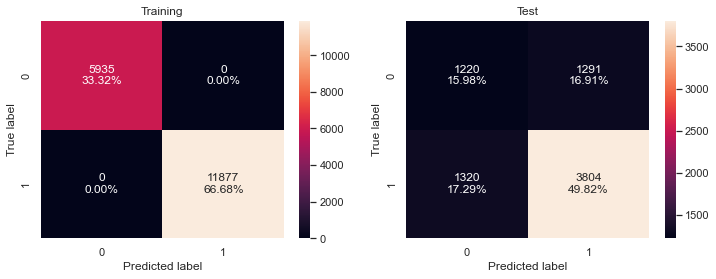

,Model / Data Set,Accuracy,Recall,Precision,F1
0,Decision Tree untuned / Training,1.000,1.000,1.000,1.000
0,Decision Tree untuned / Test,0.658,0.742,0.747,0.744


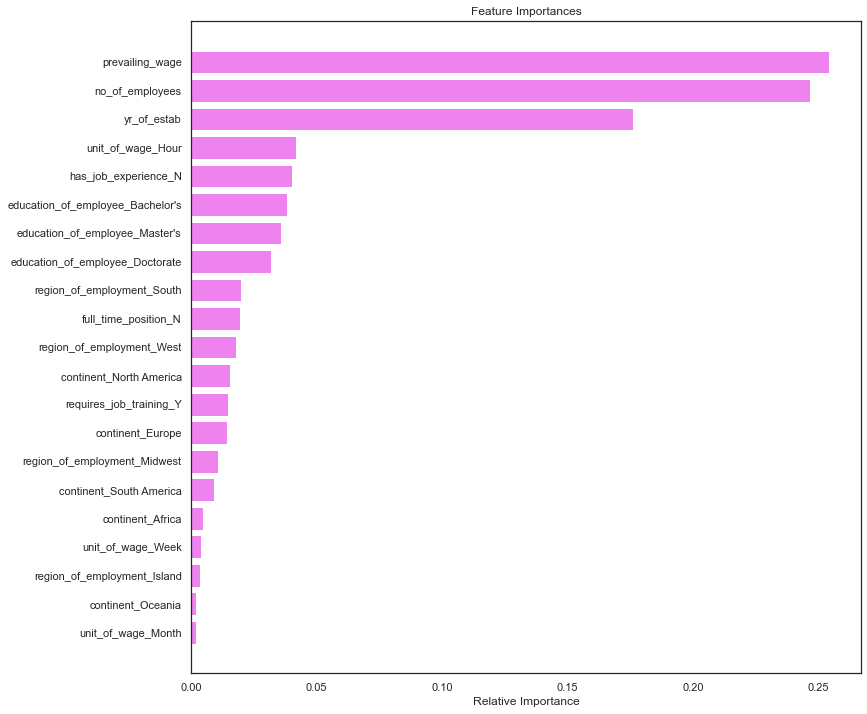

In [56]:
# add metrics to df and add features importance to importance_df to compare models later
# and print matrices, comparison table and feature importance - this is the same for all models
df.loc[len(df.index)], importance_df.loc[len(importance_df.index)]=compare_training_and_test(dt_estimator,X_train,y_train,X_test,y_test,'Decision Tree untuned')

#### Decision Tree Tuned

In [57]:
# Choose the type of classifier.
dt_estimator_tuned = DecisionTreeClassifier( random_state=1)

# Grid of parameters to choose from

parameters = {
 "max_depth": [1,2,3,6,10,15,25,50, None],
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.0005, 0.001,0.01],
    "min_samples_split":[None,1,2,5,8,10],
    "class_weight":[{0: 0.67, 1: 0.33},"balanced"]
    }

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(dt_estimator_tuned, parameters, scoring=acc_scorer, cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dt_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dt_estimator_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.67, 1: 0.33}, max_depth=10,
                       min_impurity_decrease=0.001, random_state=1)

Decision Tree tuned- Result


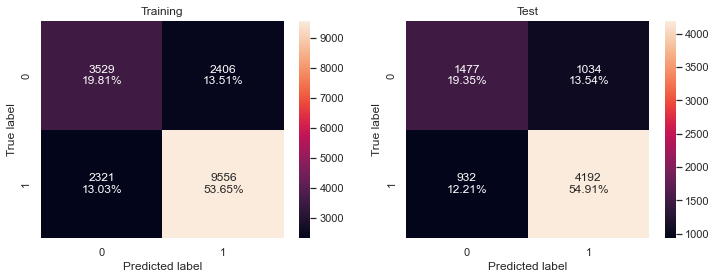

,Model / Data Set,Accuracy,Recall,Precision,F1
0,Decision Tree tuned / Training,0.735,0.805,0.799,0.802
0,Decision Tree tuned / Test,0.743,0.818,0.802,0.810


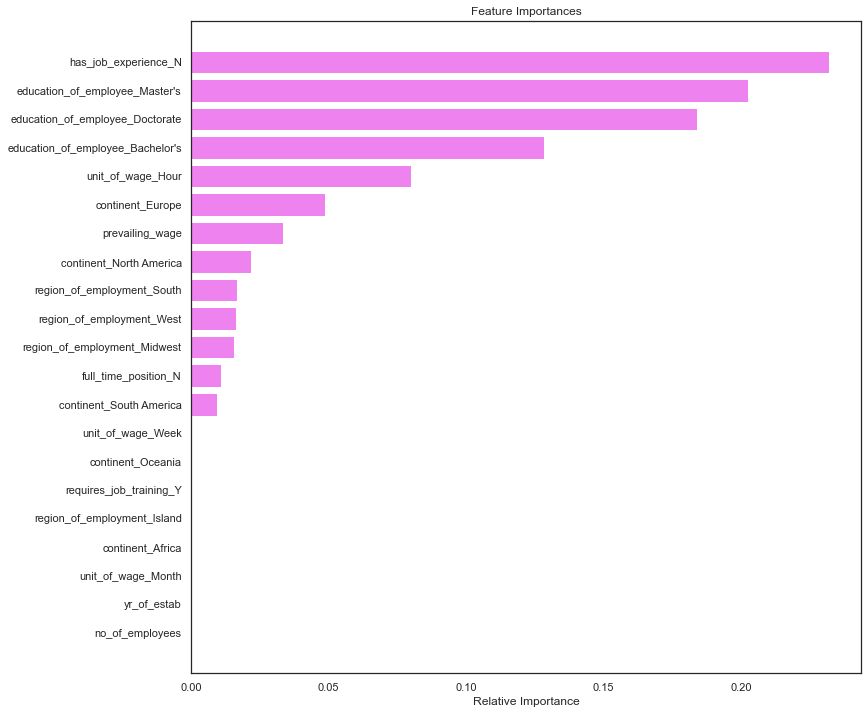

In [58]:
df.loc[len(df.index)], importance_df.loc[len(importance_df.index)]=compare_training_and_test(dt_estimator_tuned,X_train,y_train,X_test,y_test,'Decision Tree tuned')

### Bagging untuned

In [59]:
#base_estimator for bagging classifier is a decision tree by default
bagging_estimator=BaggingClassifier(random_state=1)
bagging_estimator.fit(X_train,y_train)

BaggingClassifier(random_state=1)

Bagging untuned- Result


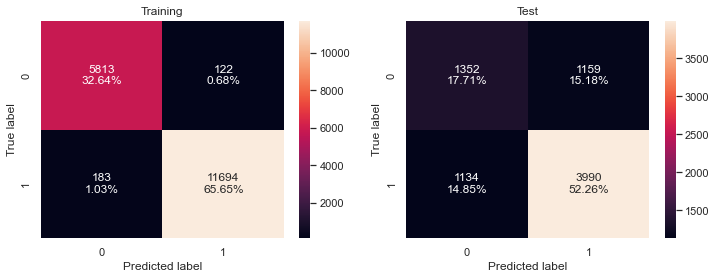

,Model / Data Set,Accuracy,Recall,Precision,F1
0,Bagging untuned / Training,0.983,0.985,0.990,0.987
0,Bagging untuned / Test,0.700,0.779,0.775,0.777


There is no feature importance attribute for this model


In [60]:
#Using above defined function to get accuracy, recall and precision on train and test set
df.loc[len(df.index)], importance_df.loc[len(importance_df.index)]=compare_training_and_test(bagging_estimator,X_train,y_train,X_test,y_test,'Bagging untuned')

### Bagging Tuned

In [61]:
# grid search for bagging classifier
cl1 = DecisionTreeClassifier(class_weight={0: 0.67, 1: 0.33},random_state=1)
param_grid = {'base_estimator':[cl1,None],
              "max_samples": [0.7, 0.9,1],
              'n_estimators':[50,90,115,130,150],
              'max_features': [.5,0.6,0.8,1]
             }

grid_bgg = GridSearchCV(BaggingClassifier(random_state=1,bootstrap=True), param_grid=param_grid, scoring = 'f1', cv = 5,n_jobs=-1)
grid_bgg.fit(X_train, y_train)

## getting the best estimator
bagging_estimator_tuned  = grid_bgg.best_estimator_
bagging_estimator_tuned.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.67,
                                                                      1: 0.33},
                                                        random_state=1),
                  max_features=0.8, max_samples=0.7, n_estimators=130,
                  random_state=1)

In [62]:
bagging_estimator_tuned.get_params()

{'base_estimator__ccp_alpha': 0.0,
 'base_estimator__class_weight': {0: 0.67, 1: 0.33},
 'base_estimator__criterion': 'gini',
 'base_estimator__max_depth': None,
 'base_estimator__max_features': None,
 'base_estimator__max_leaf_nodes': None,
 'base_estimator__min_impurity_decrease': 0.0,
 'base_estimator__min_impurity_split': None,
 'base_estimator__min_samples_leaf': 1,
 'base_estimator__min_samples_split': 2,
 'base_estimator__min_weight_fraction_leaf': 0.0,
 'base_estimator__random_state': 1,
 'base_estimator__splitter': 'best',
 'base_estimator': DecisionTreeClassifier(class_weight={0: 0.67, 1: 0.33}, random_state=1),
 'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 0.8,
 'max_samples': 0.7,
 'n_estimators': 130,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

Bagging tuned- Result


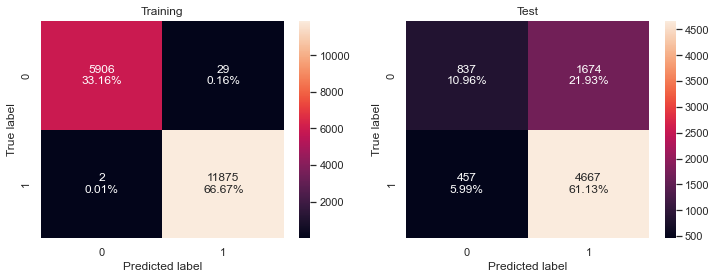

,Model / Data Set,Accuracy,Recall,Precision,F1
0,Bagging tuned / Training,0.998,1.000,0.998,0.999
0,Bagging tuned / Test,0.721,0.911,0.736,0.814


There is no feature importance attribute for this model


In [63]:
df.loc[len(df.index)], importance_df.loc[len(importance_df.index)]=compare_training_and_test(bagging_estimator_tuned,X_train,y_train,X_test,y_test,'Bagging tuned')

### Random Forest Untuned

In [64]:
#Train the random forest classifier
rf_estimator=RandomForestClassifier(random_state=1,class_weight={0: 0.67, 1: 0.33})
rf_estimator.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 0.67, 1: 0.33}, random_state=1)

Random Forest untuned- Result


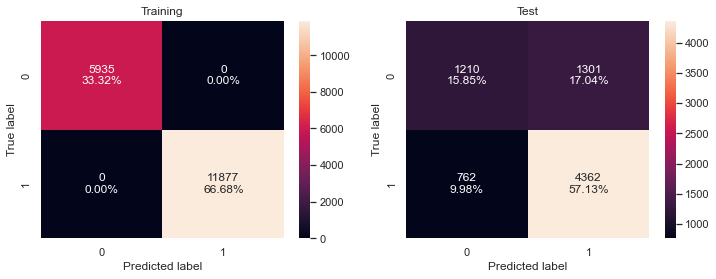

,Model / Data Set,Accuracy,Recall,Precision,F1
0,Random Forest untuned / Training,1.00,1.000,1.00,1.000
0,Random Forest untuned / Test,0.73,0.851,0.77,0.809


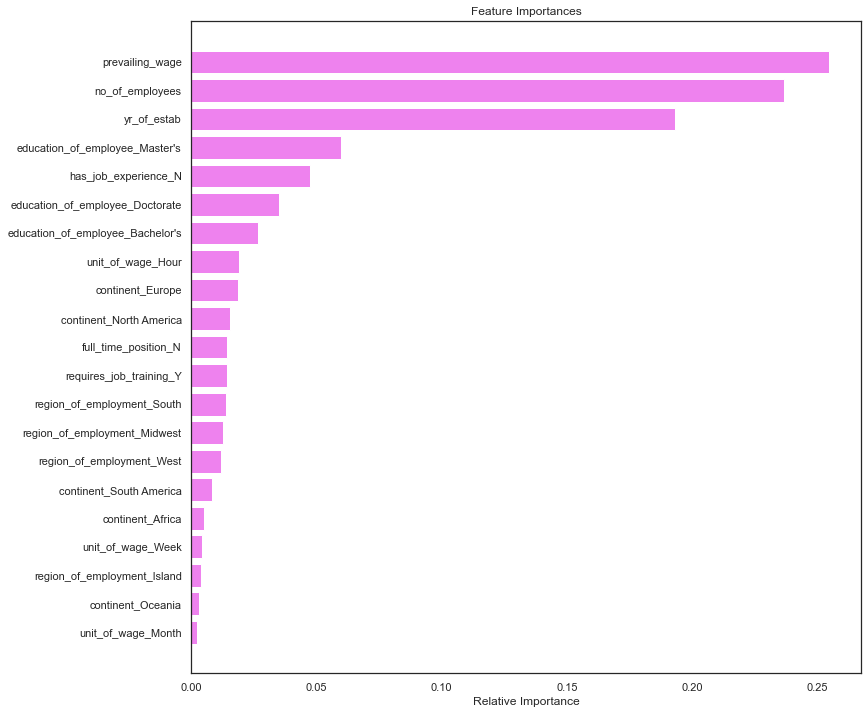

In [65]:
df.loc[len(df.index)], importance_df.loc[len(importance_df.index)]=compare_training_and_test(rf_estimator,X_train,y_train,X_test,y_test,'Random Forest untuned')

### Random Forest Tuned

In [66]:
# Choose the type of classifier. 
rf_estimator_tuned = RandomForestClassifier(random_state=1,)

# Grid of parameters to choose from
parameters = {  
        "n_estimators": [5,15,50,100],
        "min_samples_leaf": [1,5],
        "max_features": [0.7,0.9,'log2','auto'],
        "max_samples": [0.4, 0.6,None],
        "max_depth": [5,10,None],
        
}


# Run the grid search
grid_rft = GridSearchCV(rf_estimator_tuned, parameters, scoring='f1',cv=5,n_jobs=-1)
grid_rft = grid_rft.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator_tuned = grid_rft.best_estimator_

# Fit the best algorithm to the data. 
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features=0.9, min_samples_leaf=5,
                       random_state=1)

In [67]:
rf_estimator_tuned.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': 0.9,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

Random Forest tuned- Result


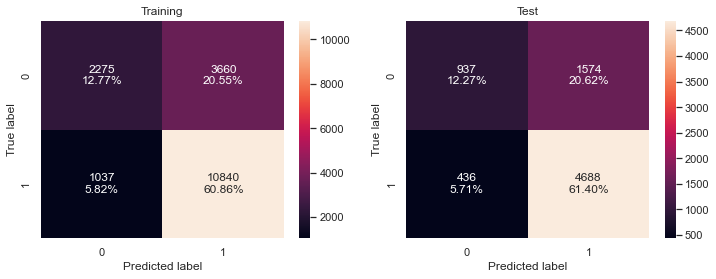

,Model / Data Set,Accuracy,Recall,Precision,F1
0,Random Forest tuned / Training,0.736,0.913,0.748,0.822
0,Random Forest tuned / Test,0.737,0.915,0.749,0.823


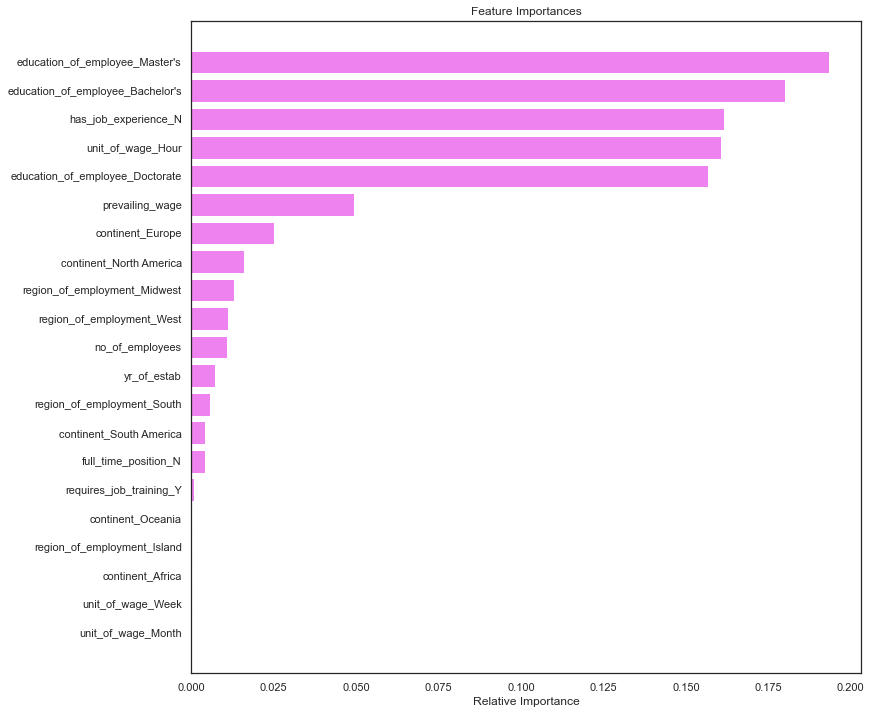

In [68]:
df.loc[len(df.index)], importance_df.loc[len(importance_df.index)]=compare_training_and_test(rf_estimator_tuned,X_train,y_train,X_test,y_test,'Random Forest tuned')

### Ada Boosting untuned

In [69]:
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

Ada Boost untuned- Result


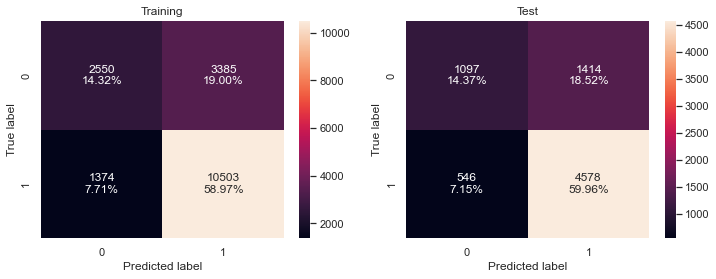

,Model / Data Set,Accuracy,Recall,Precision,F1
0,Ada Boost untuned / Training,0.733,0.884,0.756,0.815
0,Ada Boost untuned / Test,0.743,0.893,0.764,0.824


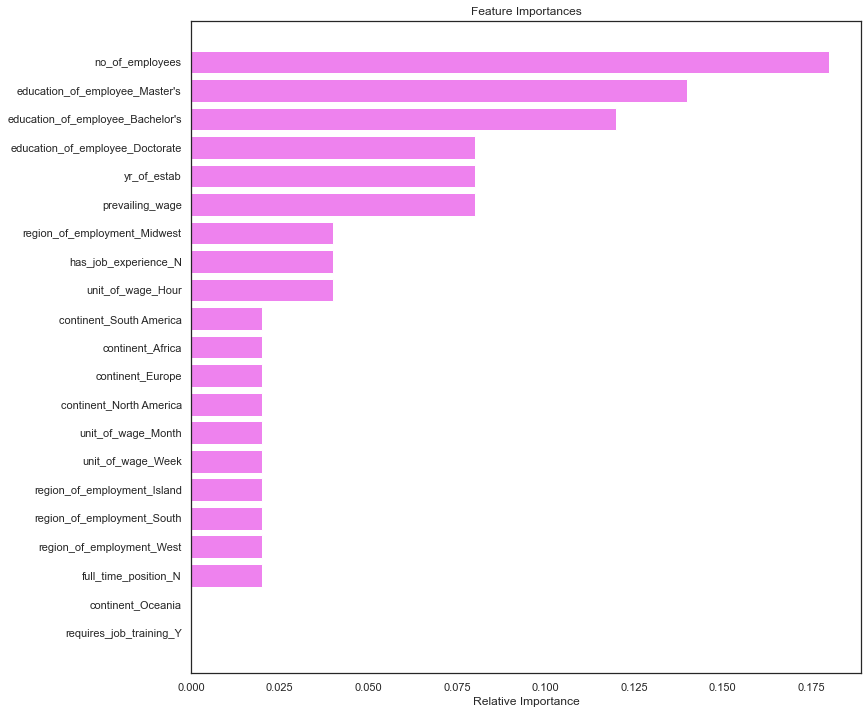

In [70]:
df.loc[len(df.index)], importance_df.loc[len(importance_df.index)]=compare_training_and_test(abc,X_train,y_train,X_test,y_test,'Ada Boost untuned')

### Ada Boosting tuned

In [71]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, class_weight="balanced", random_state=1),
        DecisionTreeClassifier(max_depth=3, class_weight="balanced", random_state=1),
        DecisionTreeClassifier(max_depth=2, class_weight={0: 0.67, 1: 0.33}, random_state=1),
    None],
    "n_estimators": [10,50,90,150],
    "learning_rate": (.2,.3,.5,1),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_abc = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer,cv=5,n_jobs=-1)
grid_abc = grid_abc.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_abc.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.5, random_state=1)

In [72]:
abc_tuned.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 0.5,
 'n_estimators': 50,
 'random_state': 1}

Ada Boost Tuned- Result


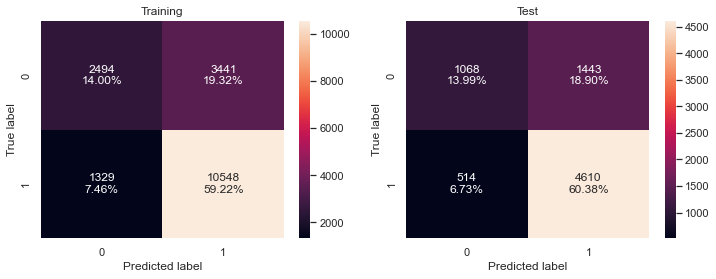

,Model / Data Set,Accuracy,Recall,Precision,F1
0,Ada Boost Tuned / Training,0.732,0.888,0.754,0.816
0,Ada Boost Tuned / Test,0.744,0.900,0.762,0.825


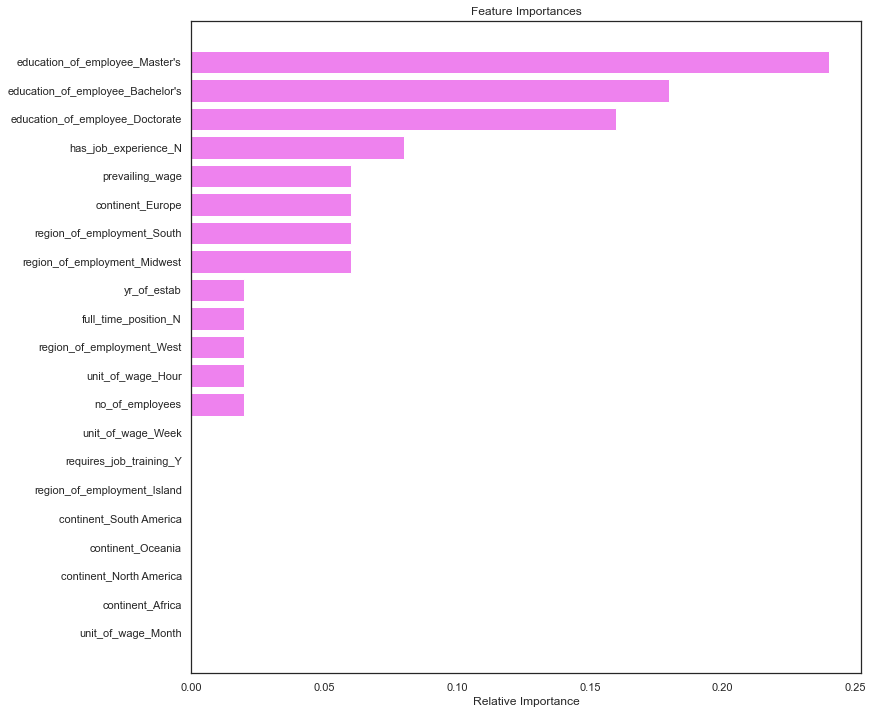

In [73]:
df.loc[len(df.index)], importance_df.loc[len(importance_df.index)]=compare_training_and_test(abc_tuned,X_train,y_train,X_test,y_test,'Ada Boost Tuned')

### Gradient Boosting untuned

In [74]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

Gradient Boosting untuned- Result


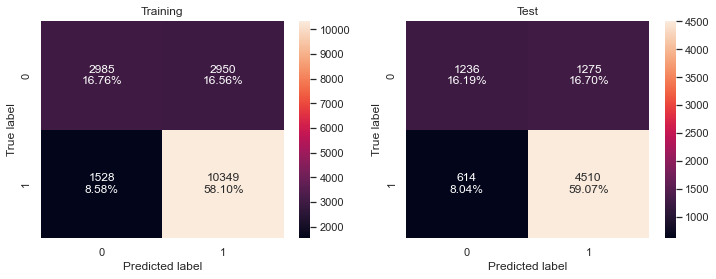

,Model / Data Set,Accuracy,Recall,Precision,F1
0,Gradient Boosting untuned / Training,0.749,0.871,0.778,0.822
0,Gradient Boosting untuned / Test,0.753,0.880,0.780,0.827


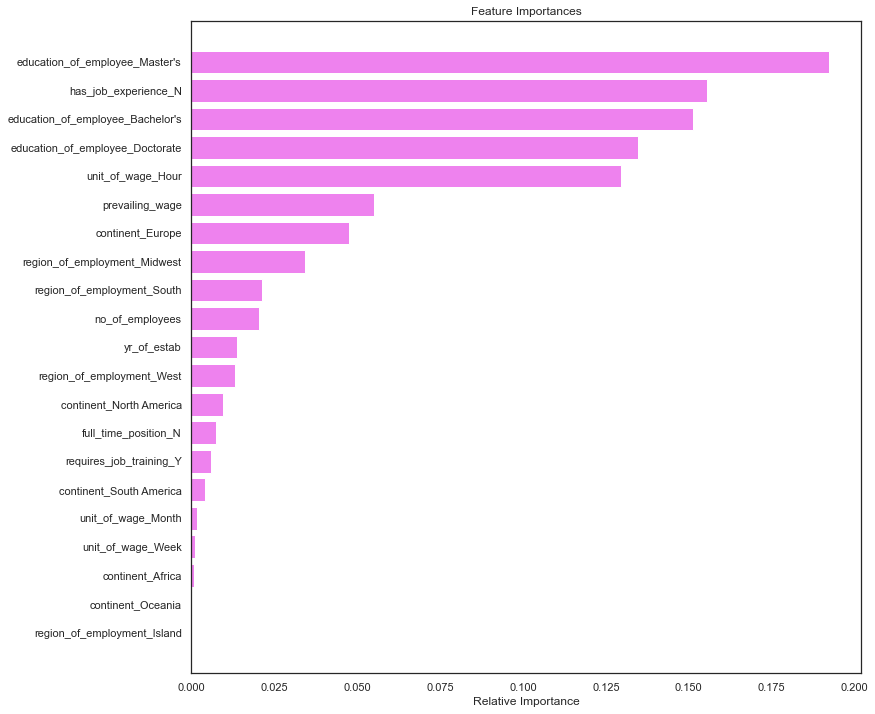

In [75]:
df.loc[len(df.index)], importance_df.loc[len(importance_df.index)]=compare_training_and_test(gbc,X_train,y_train,X_test,y_test,'Gradient Boosting untuned')

In [76]:
gbc.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 1,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

### Gradient Boosting tuned

In [77]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample": [0.9, 1],
    "max_features": ['sqrt',0.7, 0.85, 1,None],
    "learning_rate": [.05, .1,.3,.7]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_gcb = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer,cv=5,n_jobs=-1)
grid_gcb = grid_gcb.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_gcb.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features='sqrt', n_estimators=200,
                           random_state=1, subsample=0.9)

In [78]:
gbc_tuned.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init__algorithm': 'SAMME.R',
 'init__base_estimator': None,
 'init__learning_rate': 1.0,
 'init__n_estimators': 50,
 'init__random_state': 1,
 'init': AdaBoostClassifier(random_state=1),
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_iter_no_change': None,
 'random_state': 1,
 'subsample': 0.9,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

Gradient Boosting tuned- Result


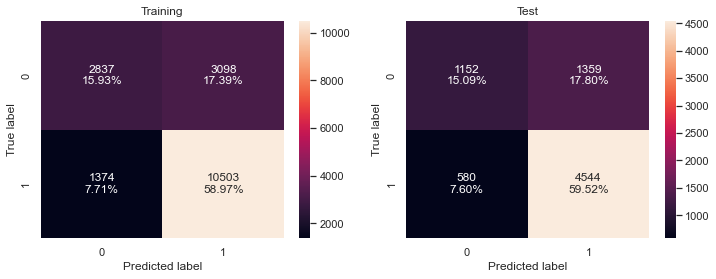

,Model / Data Set,Accuracy,Recall,Precision,F1
0,Gradient Boosting tuned / Training,0.749,0.884,0.772,0.824
0,Gradient Boosting tuned / Test,0.746,0.887,0.770,0.824


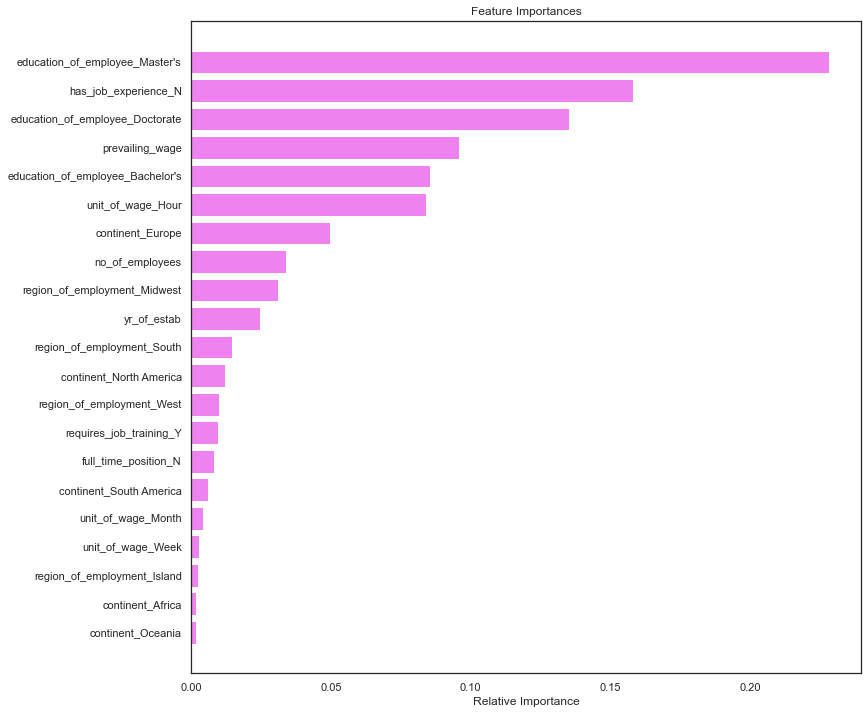

In [79]:
df.loc[len(df.index)], importance_df.loc[len(importance_df.index)]=compare_training_and_test(gbc_tuned,X_train,y_train,X_test,y_test,'Gradient Boosting tuned')

### XG Boost untuned

In [80]:
xgb = XGBClassifier(random_state=1, eval_metric='logloss')
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

XGBoost untuned- Result


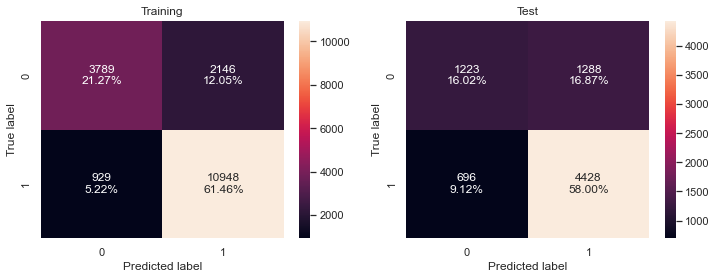

,Model / Data Set,Accuracy,Recall,Precision,F1
0,XGBoost untuned / Training,0.827,0.922,0.836,0.877
0,XGBoost untuned / Test,0.740,0.864,0.775,0.817


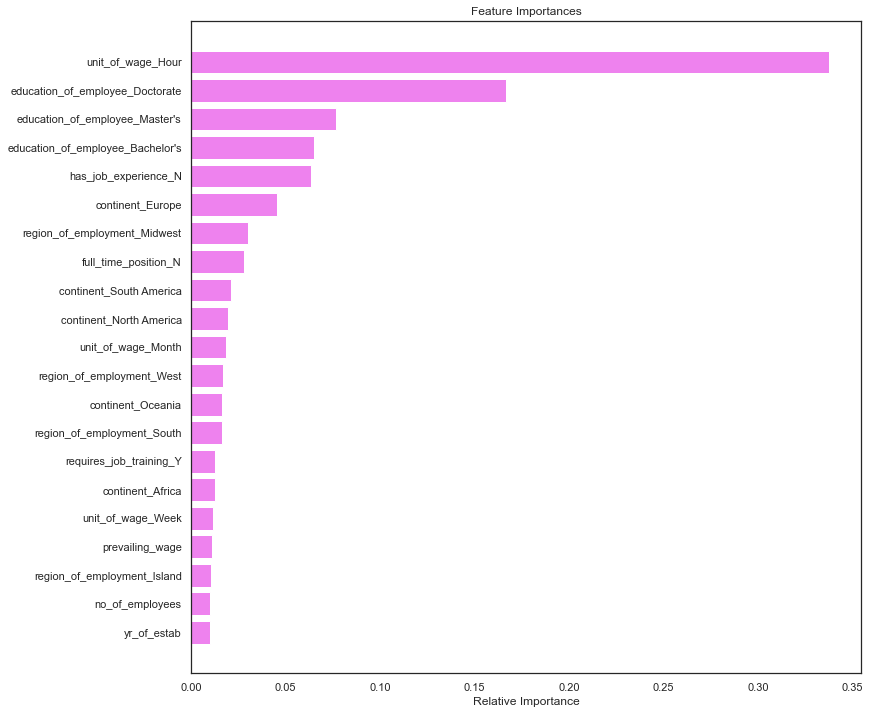

In [81]:
df.loc[len(df.index)], importance_df.loc[len(importance_df.index)]=compare_training_and_test(xgb,X_train,y_train,X_test,y_test,'XGBoost untuned')

In [82]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1, eval_metric='logloss')

# Grid of parameters to choose from
parameters = {
    "n_estimators": [10,50,100],
    "scale_pos_weight":[1,2],
    "subsample":[.6,0.7,0.8],
    "learning_rate":[0.01,0.02, 0.05, 0.1],
    "colsample_bytree":[0.8,0.9,1],
    "colsample_bylevel":[0.5,0.7,1],
    "gamma": [3, 5],
    
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_xgb = GridSearchCV(xgb_tuned, parameters,scoring=scorer,cv=5,n_jobs=-1)
grid_xgb = grid_xgb.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_xgb.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.5,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=5, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.02, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=10, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [83]:
xgb_tuned.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': True,
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 0.5,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'enable_categorical': False,
 'gamma': 5,
 'gpu_id': -1,
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.02,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 10,
 'n_jobs': 8,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 1,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 0.8,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None,
 'eval_metric': 'logloss'}

XGBoost tuned- Result


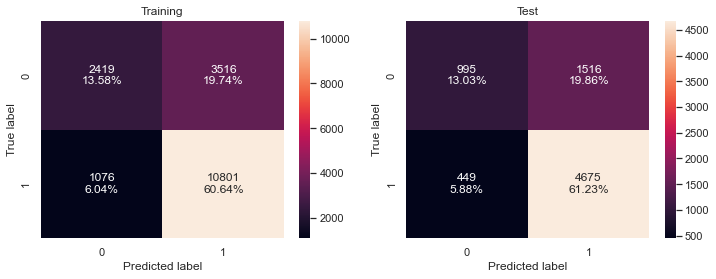

,Model / Data Set,Accuracy,Recall,Precision,F1
0,XGBoost tuned / Training,0.742,0.909,0.754,0.825
0,XGBoost tuned / Test,0.743,0.912,0.755,0.826


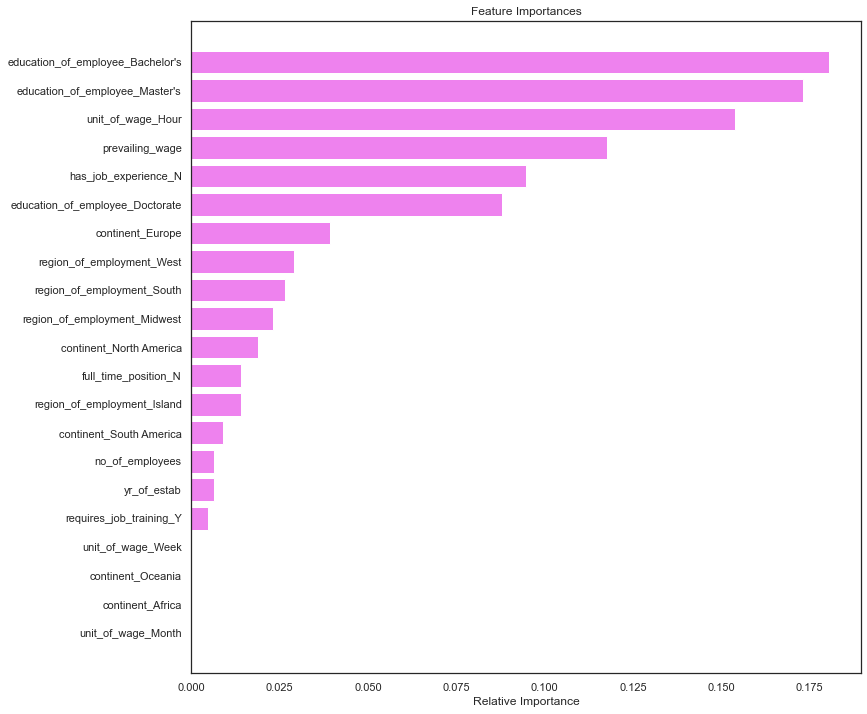

In [84]:
df.loc[len(df.index)], importance_df.loc[len(importance_df.index)]=compare_training_and_test(xgb_tuned,X_train,y_train,X_test,y_test,'XGBoost tuned')

Now that we ran all our base models, I'll use stacking to combine them all. For this I will use all tuned models as base estimators and will loop through all the models from above to see which one is the best final estimator.

In [85]:
# initialize df that compares metrics of different models 
df_stacking = pd.DataFrame(columns=['Model','Accuracy Training','Accuracy Test','Training Recall','Test Recall','Training Precision','Test Precision','Training F1','Test F1'])


# List of all models
final_est=(xgb_tuned,xgb,gbc_tuned,gbc,abc_tuned,abc,rf_estimator,rf_estimator_tuned,bagging_estimator_tuned,bagging_estimator,dt_estimator_tuned,dt_estimator)

# stacking estimaror built from all tuned models
stacking_estimators = [ ("Ada",abc_tuned),('Decision Tree',dt_estimator_tuned),('Gradient Boost',gbc_tuned),('Random Forest',rf_estimator_tuned),('XGBoost',xgb_tuned)]

# rotate through all models
for i, variable in enumerate(final_est):
    
    #build stacking model
    stacking_classifier_tuned= StackingClassifier(estimators=stacking_estimators,final_estimator=variable)
    stacking_classifier_tuned.fit(X_train,y_train)
    
    # get final estimator model name
    name = model_dict.get(variable)
    
    # add to comparison df
    df_stacking.loc[len(df_stacking.index)]=compare_stacking_training_and_test(stacking_classifier_tuned,X_train,y_train,X_test,y_test,model_name=name)

In [86]:
# Compare Stacking models
df_stacking

,Model,Accuracy Training,Accuracy Test,Training Recall,Test Recall,Training Precision,Test Precision,Training F1,Test F1
0,XGBoost tuned,0.751,0.757,0.858,0.867,0.787,0.790,0.821,0.827
1,XGBoost untuned,0.737,0.743,0.869,0.874,0.767,0.773,0.815,0.820
2,Gradient Boosting tuned,0.751,0.754,0.860,0.869,0.786,0.787,0.821,0.826
3,Gradient Boosting untuned,0.751,0.755,0.863,0.871,0.785,0.786,0.822,0.826
4,Ada Boost Tuned,0.750,0.755,0.868,0.876,0.781,0.784,0.822,0.828
5,Ada Boost untuned,0.751,0.755,0.854,0.863,0.789,0.792,0.820,0.826
6,Random Forest untuned,0.732,0.732,0.879,0.881,0.758,0.759,0.814,0.816
7,Random Forest tuned,0.751,0.756,0.861,0.869,0.786,0.789,0.822,0.827
8,Bagging tuned,0.731,0.735,0.881,0.882,0.756,0.761,0.814,0.817
9,Bagging untuned,0.696,0.693,0.776,0.782,0.769,0.766,0.773,0.774


There are a lot of good models, but the best F1 score comes with the final estimator AdaBoost tuned.

In [87]:
# The final stacking model
stacking_estimators = [ ("Ada",abc_tuned),('Decision Tree',dt_estimator_tuned),('Gradient Boost',gbc_tuned),('Random Forest',rf_estimator_tuned),('XGBoost',xgb_tuned)]

final_model = abc_tuned

stacking_classifier_tuned= StackingClassifier(estimators=stacking_estimators,final_estimator=final_model)
stacking_classifier_tuned.fit(X_train,y_train)

StackingClassifier(estimators=[('Ada',
                                AdaBoostClassifier(learning_rate=0.5,
                                                   random_state=1)),
                               ('Decision Tree',
                                DecisionTreeClassifier(class_weight={0: 0.67,
                                                                     1: 0.33},
                                                       max_depth=10,
                                                       min_impurity_decrease=0.001,
                                                       random_state=1)),
                               ('Gradient Boost',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features='sqrt',
                                                           n_estimators=200,
                                                           random_stat...
         

Stacking w/ AdaBoost tuned- Result


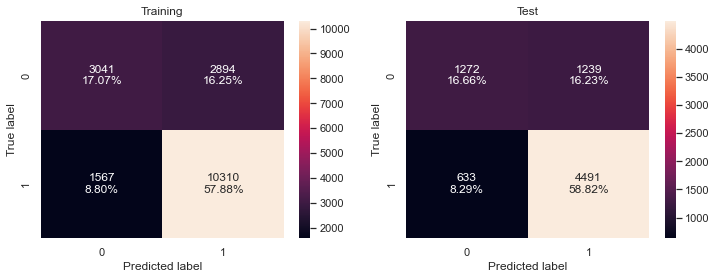

,Model / Data Set,Accuracy,Recall,Precision,F1
0,Stacking w/ AdaBoost tuned / Training,0.750,0.868,0.781,0.822
0,Stacking w/ AdaBoost tuned / Test,0.755,0.876,0.784,0.828


There is no feature importance attribute for this model


In [88]:
df.loc[len(df.index)], importance_df.loc[len(importance_df.index)]=compare_training_and_test(stacking_classifier_tuned,X_train,y_train,X_test,y_test,'Stacking w/ AdaBoost tuned')

## Model Performance Comparison and Conclusions

### Model Comparison

In [89]:
df

,Model,Accuracy Training,Accuracy Test,Training Recall,Test Recall,Training Precision,Test Precision,Training F1,Test F1
0,Decision Tree untuned,1.000,0.658,1.000,0.742,1.000,0.747,1.000,0.744
1,Decision Tree tuned,0.735,0.743,0.805,0.818,0.799,0.802,0.802,0.810
2,Bagging untuned,0.983,0.700,0.985,0.779,0.990,0.775,0.987,0.777
3,Bagging tuned,0.998,0.721,1.000,0.911,0.998,0.736,0.999,0.814
4,Random Forest untuned,1.000,0.730,1.000,0.851,1.000,0.770,1.000,0.809
5,Random Forest tuned,0.736,0.737,0.913,0.915,0.748,0.749,0.822,0.823
6,Ada Boost untuned,0.733,0.743,0.884,0.893,0.756,0.764,0.815,0.824
7,Ada Boost Tuned,0.732,0.744,0.888,0.900,0.754,0.762,0.816,0.825
8,Gradient Boosting untuned,0.749,0.753,0.871,0.880,0.778,0.780,0.822,0.827
9,Gradient Boosting tuned,0.749,0.746,0.884,0.887,0.772,0.770,0.824,0.824


- Appart from the untuned Bagging and the untuned Decicion Tree all models performed with a F1 score above 0.8 in the Test data, which is a good result.

- The best model is Stacking with a tuned AdaBoost Classifier as the final estimator.

- Apart from Gradient Boosting all models improved the F1 score on the Test data upon tuning. With Gradient Boosting the tuned model did a bit better on the Training Data though. The default parameters were part of the grid search in the tuned model.


### Important features

Since our final model doesn't come with feature_importance, let's look at our other models with really high F1 scores, which are all the Boosting models apart from untuned XGBoost.

In [90]:
importance_df

,Model,Most,Most perc,Second,Second Perc,Third,Third Perc
0,Decision Tree untuned,prevailing_wage,0.25,no_of_employees,0.25,yr_of_estab,0.18
1,Decision Tree tuned,has_job_experience_N,0.23,education_of_employee_Master's,0.20,education_of_employee_Doctorate,0.18
2,Bagging untuned,n/a,0.00,n/a,0.00,n/a,0.00
3,Bagging tuned,n/a,0.00,n/a,0.00,n/a,0.00
4,Random Forest untuned,prevailing_wage,0.25,no_of_employees,0.24,yr_of_estab,0.19
5,Random Forest tuned,education_of_employee_Master's,0.19,education_of_employee_Bachelor's,0.18,has_job_experience_N,0.16
6,Ada Boost untuned,no_of_employees,0.18,education_of_employee_Master's,0.14,education_of_employee_Bachelor's,0.12
7,Ada Boost Tuned,education_of_employee_Master's,0.24,education_of_employee_Bachelor's,0.18,education_of_employee_Doctorate,0.16
8,Gradient Boosting untuned,education_of_employee_Master's,0.19,has_job_experience_N,0.16,education_of_employee_Bachelor's,0.15
9,Gradient Boosting tuned,education_of_employee_Master's,0.23,has_job_experience_N,0.16,education_of_employee_Doctorate,0.13


Feature Importance is not consistent over the models, but our highest performing models are the tuned boosting models, so we will look at those:
- Education is the biggest decision making factor, followed by whether a person has job experience and the unit of wage also played a role. 
- The regions and the continents played less of a role than I expected.
- In neither of the models did the the fact of whether it was a full time job or the job require training make an impact.

## Actionable Insights and Recommendations

Our model will shortlist the applicants who are either to be denied or certified. This will make the certification process for visas who are correctly categorized much faster, and thus the overall process time of visa application should be increased too, even if they are in the false category.

Faster processing is better for everyone involved, since once a decision has been made, the applicant and the company can move forward. And the OLFC needs less employees with the model doing some prep work.


Some more data to ask for would be the company that requested the visa, since companies who request visas a lot know what they are doing and are less likely to put the effort into requesting a visa if they know they can get local workers.

As I said before, the wages need to be looked into some more since prevailing wage cannot be below minimum wage.

## Appendix

### Wages

A fulltime job is considered to be a job over 32 hours/week. With the year having 52 weeks, the minimum annual salary in 2018 would be 7.25 * 52 * 32 = 12,064, monthly= 7.25 * 32 * 4, and weekly = 7.25 * 32.
Let's take a look at how many applications with a full time position are below that number.

In [91]:
# Yearly wage
wages[(wages['unit_of_wage']=='Year')&(wages['full_time_position']=='Y')&(wages['prevailing_wage']<7.25*32*52)]['prevailing_wage'].count()

1220

In [92]:
# Hourly wage
wages[(wages['unit_of_wage']=='Hour')&(wages['full_time_position']=='Y')&(wages['prevailing_wage']<7.25)]['prevailing_wage'].count()

11

In [93]:
# Monthly wage
wages[(wages['unit_of_wage']=='Month')&(wages['full_time_position']=='Y')&(wages['prevailing_wage']<7.25*32*4)]['prevailing_wage'].count()

0

In [94]:
# Weekly wage
wages[(wages['unit_of_wage']=='Week')&(wages['full_time_position']=='Y')&(wages['prevailing_wage']<7.25*32)]['prevailing_wage'].count()

0

That is 1231 applications with a prevailing wage below the minimum. And this has been very generously calculated. If we assume full time is 40 hours/week, that would add 300 more.
So if this were a real life project, I would definitely follow up on that.